<a href="https://colab.research.google.com/github/Pratik94229/Capstone-Project-2/blob/main/Final_Retail_Sales_Prediction_Capstone_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Rossmann Retail Stores Sales Prediction



# **Project Summary :-**

### Company's Introduction

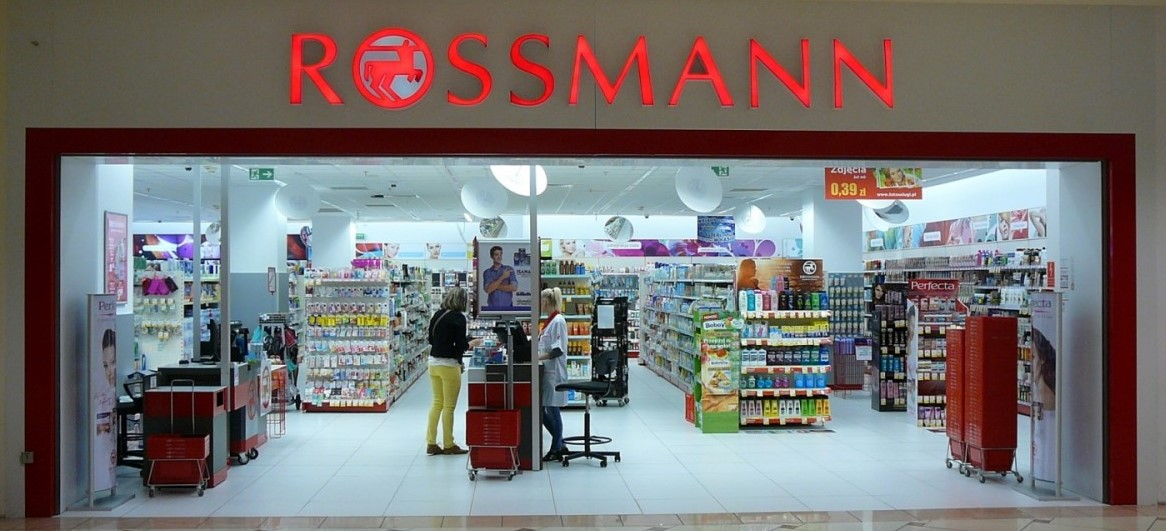

* Dirk Rossmann GmbH, commonly referred to as Rossmann, is one of the largest
drug store chains in Europe with around 56,200 employees and more than 4000 stores.

* The company was founded in 1972 by Dirk Rossmann with its headquarters in Burgwedel near Hanover in Germany. The Rossmann family owns 60% of the company. The Hong Kong-based A.S. Watson Group owns 40%, which was taken over from the Dutch Kruidvat in 2004.

* The company logo consists of a red name and the symbol of a centaur integrated in the letter O: a mythical creature made of horse and man from Greek mythology, which symbolically stands for "Rossmann" (In English: "Horse man").


### Problem Overview

* Rossman Sales Prediction data is a data set containing historical sales data for a retail chain. The data includes store information, such as competitor details, store type, holidays and sales transaction.
* Using the data given we had to build a model for forecasting the sales in future.
* To build a machine learning model, we first perform EDA with various plots for better visualization.
* And then we split it into a training set and a test set and applied various machine learning algorithms using the training data to train the model. Finally, we evaluated the model's performance on the test data to see how well it predicted sales.

### Analysis Performed

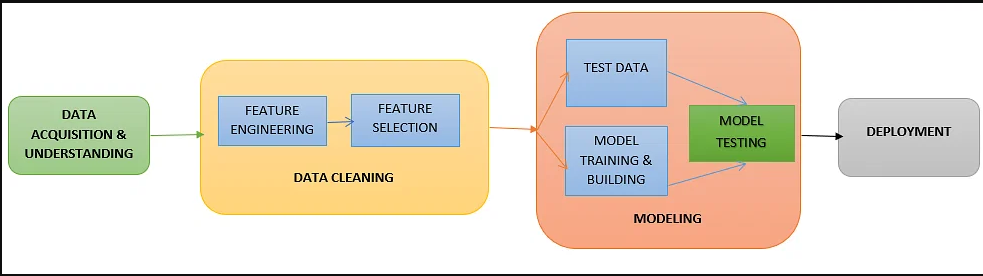

**Steps involved in building a ML Model:**

> Step 1: Data gathering and Understanding

> Step 2: Data preparation

> Step 3: Data Cleaning

> Step 4: Exploratory data analysis

> Step 5: Feature engineering and selection

> Step 6: ML Model assumption and checks

> Step 7: Data preparation for modelling

> Step 8: Model Building

> Step 9: Model Validation & Evaluation

> Step 10: Predictions & Saving model using pickel library.


**Libraries used in EDA & Machine Learning:**
1. Pandas
2. Numpy
3. Matplotib
4. Seaborn
5. Plotly
6. Sklearn
7. Scipy


**Graphs used for representation:**
1. Bar plot
2. Pie plot
3. Box Plot
4. Grouped bar plot
5. Donut plot
6. Heatmap
7. Pair plot

**Insights from EDA impacting business:**

* The most selling and crowded store type is A.
* More stores are opened during School holidays than State holidays.
* Mondays have most sales since most of the Sundays are closed.
* Promo 1 has given positive yields where as Promo 2 is a disaster.
* Store type b has higher sales and customers per store than other store types. 
* Assortment b is available only at store type b and it has more sales and customers than any other assortment.

**Suggestions provided to increase the Sales:**

* There are very few B type stores, few more can be opened as average sales are quite high as compared to other types.
* Assortment B is only available with store type B which can be extended to other types as well to cater the demands of customers.
* Promo 2 should be discontinued and Promo 1 can be extended futher as it shows better results.
* Very few stores are opened during State Holidays, so it suggested to open a subsequent amount of stores to serve in emergency purposes.

**Model Implementation:**

* Our aim was to predict sales for a particular store using various regression algorithms and time series analysis.
*  The following algorithms were used for regression analysis: Linear Regression, Lasso Regression, Ridge Regression, Decision Tree Regressor, Extra Tree Regressor, XG Boost Regressor, and Light GBM Regressor. The models were trained on a dataset containing historical sales data for the store, along with other relevant features such as promotional events, holidays, and weather conditions.

* After evaluating the performance of each regression model using appropriate metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared score, it was found that the LightGBM performed the best among all the models with the lowest MSE and RMSE.

* Next, time series analysis was also performed using Facebook Prophet library to forecast future sales for the store. The historical sales data was preprocessed and used to train a Prophet model. Future sales predictions were made for the next year using the trained model, and the results were plotted to visualize the forecasted sales.

Overall, this project demonstrated the use of various regression algorithms and time series analysis to predict sales for a particular store, with the XG Boost Regressor performing the best among all models. Additionally, the project highlighted the importance of selecting appropriate evaluation metrics and preprocessing techniques for regression analysis.




**ML Model selected for deployment: Light GBM**
> Light GBM is a fast, distributed, high-performance gradient boosting framework that uses a tree-based learning algorithm. It also supports GPU learning and is thus widely used for data science application development.

**Advantages:**
* **Faster training speed and higher efficiency**: Light GBM uses a histogram-based algorithm i.e it buckets continuous feature values into discrete bins which fasten the training procedure.

* **Lower memory usage**: Replaces continuous values to discrete bins which results in lower memory usage.

*  **Better accuracy** : It produces much more complex trees by following **leaf wise split approach** rather than a **level-wise approach** which is the main factor in achieving higher accuracy.

* **Good Compatibility with Large Datasets**: It is capable of performing equally well with large datasets with a significantly less  training time as compared to XGBoost.


**Limitations:**

* **Complexity**: Light GBM split the tree leaf-wise which can lead to overfitting as it produces much complex trees.
* **Overfitting**: Light GBM is sensitive to overfitting and thus can easily overfit small dataset.


**Suggestion:**
* When we are dealing with huge dataset & time is a constraint use Light GBM Model else when dataset is small than XGBoost can provide better results.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

# ***Let's Begin !***

In [ ]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#For model selection and finding best parameters using automl library 
!pip install flaml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
# Standard Libraries import for data handling and manipulation of dataset
import numpy as np
import pandas as pd
from numpy import math

#For handling date column
from datetime import datetime

#For visualization purpose
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as px
import plotly.express as x

#For normalization of columns in dataset
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#For splitting our data for model training and testing
from sklearn.model_selection import train_test_split

#For model creation and statistical calculation 
import scipy.stats as stats

#Implementing statistical model
import statsmodels.api as sm

#For feature selection
from sklearn import feature_selection
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Models  Linear Regression
from sklearn.linear_model import LinearRegression,Lasso,Ridge

# Models for non linear Regression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
import xgboost as xgb
from lightgbm import LGBMRegressor

#For model evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#For Cross Validation of model score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#For hypothesis testing
from statsmodels.stats.weightstats import ztest
from scipy.stats import pearsonr

#For finding best model and hyperparameters
from flaml import AutoML

#For time series analysis
import io, os, sys, setuptools, tokenize
from prophet import Prophet


# Model saving
import pickle

%matplotlib inline

#For printing all the columns in pandas
pd.set_option('display.max_columns', None)

#For ignoring warnings
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Loading Dataset
working_dir='/content/drive/MyDrive/Colab Notebooks/Module 3/capstone project 2 group/'
dataset_1=pd.read_csv(working_dir + 'Rossmann Stores Data.csv')
dataset_2=pd.read_csv(working_dir + 'store.csv')

### Dataset First View

In [ ]:
# Dataset First Look
dataset_1.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

In [ ]:
dataset_2.head()

Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,Jul,Oct  
3              NaN  
4              NaN

In [ ]:
dataset_2.describe()

Store  CompetitionDistance  CompetitionOpenSinceMonth  \
count  1115.00000          1112.000000                 761.000000   
mean    558.00000          5404.901079                   7.224704   
std     322.01708          7663.174720                   3.212348   
min       1.00000            20.000000                   1.000000   
25%     279.50000           717.500000                   4.000000   
50%     558.00000          2325.000000                   8.000000   
75%     836.50000          6882.500000                  10.000000   
max    1115.00000         75860.000000                  12.000000   

       CompetitionOpenSinceYear       Promo2  Promo2SinceWeek  Promo2SinceYear  
count                761.000000  1115.000000       571.000000       571.000000  
mean                2008.668857     0.512108        23.595447      2011.763573  
std                    6.195983     0.500078        14.141984         1.674935  
min                 1900.000000     0.000000         1.000000      2009.000000  
25%                 2006.000000     0.000000        13.000000      2011.000000  
50%                 2010.000000     1.000000        22.000000      2012.000000  
75%                 2013.000000     1.000000        37.000000      2013.000000  
max                 2015.000000     1.000000        50.000000      2015.000000

### Dataset Rows & Columns count

In [ ]:
# Checking Rows and Columns
dataset_1.shape

(1017209, 9)

In [ ]:
dataset_2.shape

(1115, 10)

###Merging Both Datasets 

In [ ]:
# Mearging on the basis of Store
merged_dataset=pd.merge(dataset_1, dataset_2, on='Store', how='inner')

In [ ]:
# Create a Copy for anaysis
df = merged_dataset.copy()

In [ ]:
# mearged data set first view
df.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      1          4  2015-07-30   5020        546     1      1            0   
2      1          3  2015-07-29   4782        523     1      1            0   
3      1          2  2015-07-28   5011        560     1      1            0   
4      1          1  2015-07-27   6102        612     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         c          a               1270.0   
2              1         c          a               1270.0   
3              1         c          a               1270.0   
4              1         c          a               1270.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                        9.0                    2008.0       0   
2                        9.0                    2008.0       0   
3                        9.0                    2008.0       0   
4                        9.0                    2008.0       0   

   Promo2SinceWeek  Promo2SinceYear PromoInterval  
0              NaN              NaN           NaN  
1              NaN              NaN           NaN  
2              NaN              NaN           NaN  
3              NaN              NaN           NaN  
4              NaN              NaN           NaN

### Dataset Information

In [ ]:
# Dataset Rows & Columns count
df.shape

(1017209, 18)

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df[df.duplicated()].count()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isna().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

<Axes: >

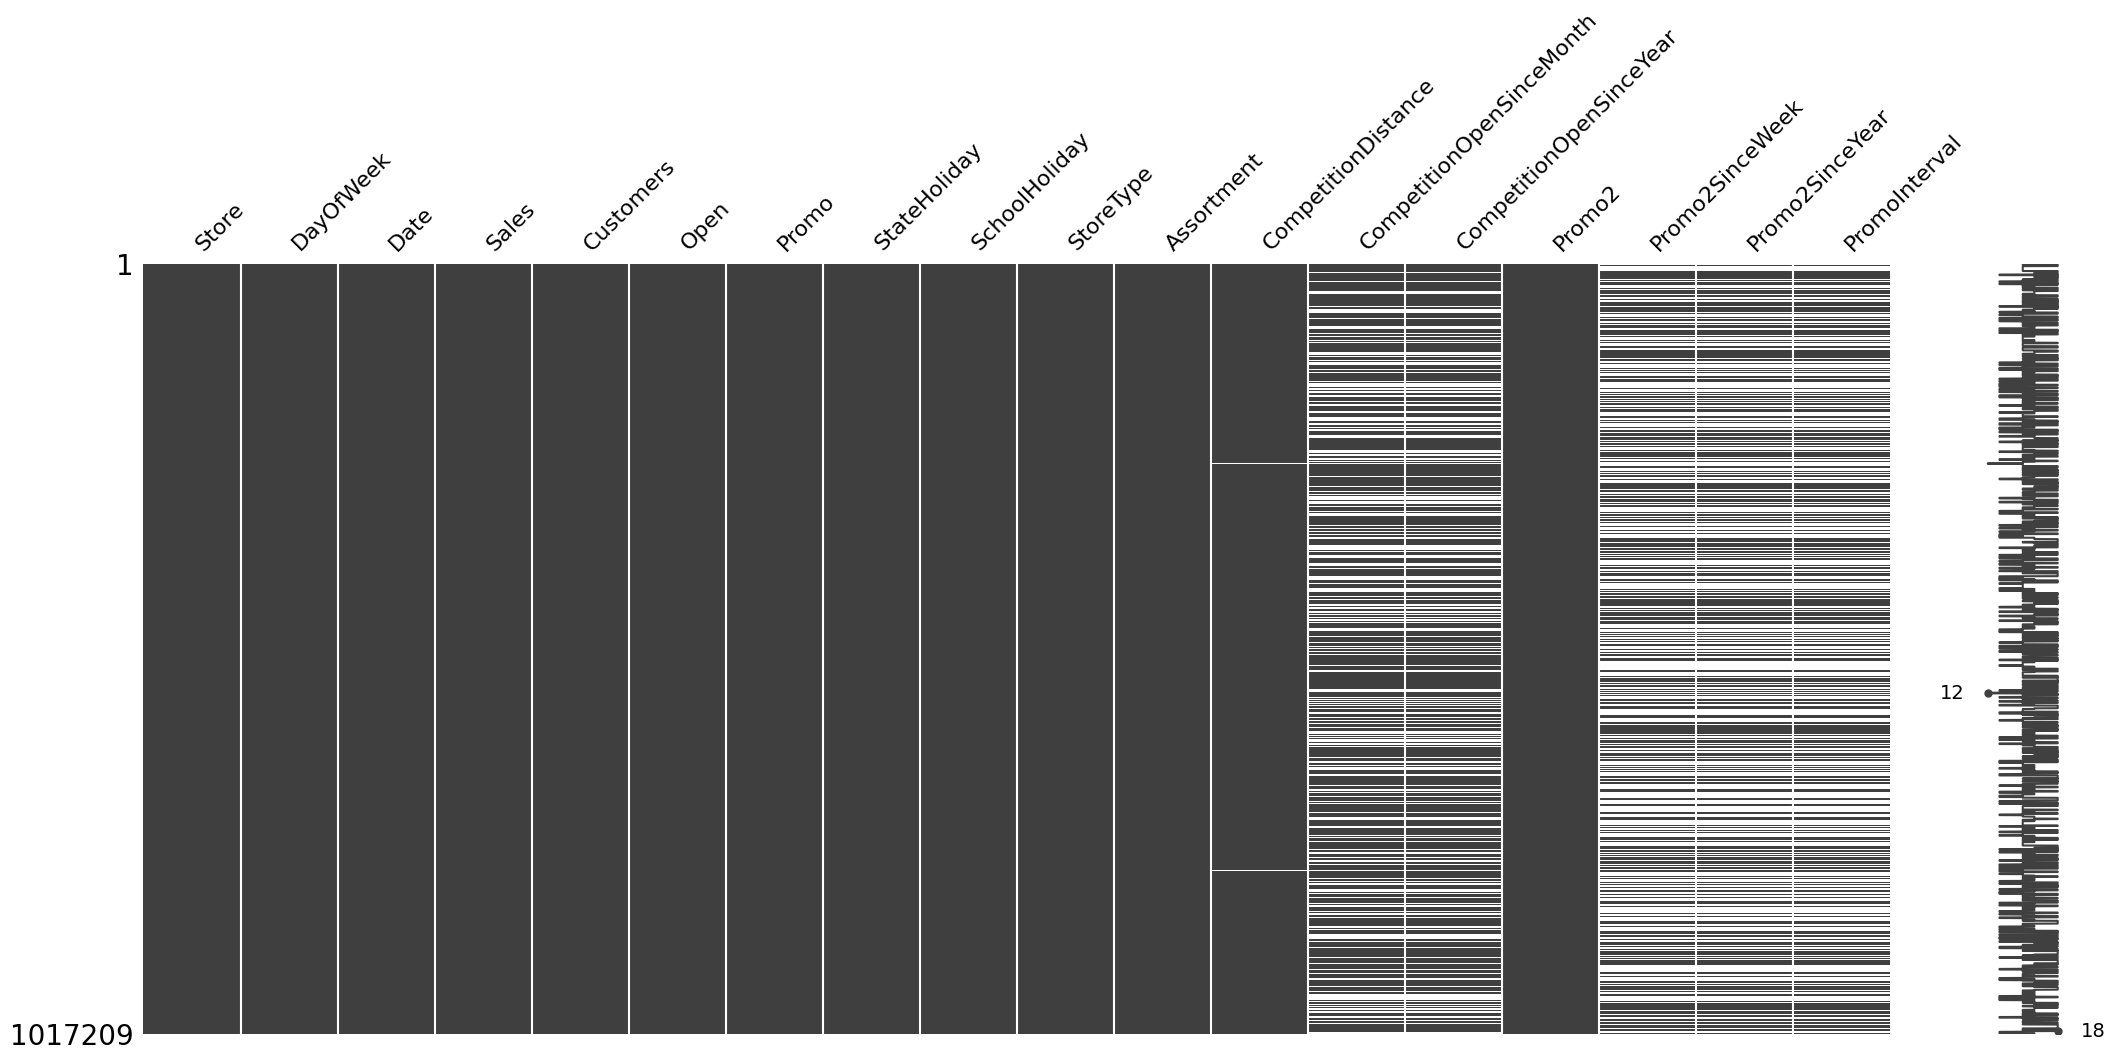

In [ ]:
# Visualizing the missing values 
import missingno as msno
msno.matrix(df)

### Treating null/NaN Values

In [ ]:
# Replacing Nan values with median in CompetitionDistance
df['CompetitionDistance'] = df['CompetitionDistance'].fillna(df['CompetitionDistance'].median())

# Replacing Nan values with median in CompetitionOpenSinceMonth
df['CompetitionOpenSinceMonth'] = df['CompetitionOpenSinceMonth'].fillna(df['CompetitionOpenSinceMonth'].median())

# Replacing Nan values with median in CompetitionOpenSinceYear
df['CompetitionOpenSinceYear'] = df['CompetitionOpenSinceYear'].fillna(df['CompetitionOpenSinceYear'].median())

# Replacing Nan values with 0 in Promo2SinceWeek
df['Promo2SinceWeek'] = df['Promo2SinceWeek'].fillna(0)

# Replacing Nan values with 0 in Promo2SinceYear
df['Promo2SinceYear'] = df['Promo2SinceYear'].fillna(0)

# Replacing Nan values with 0 in PromoInterval
df['PromoInterval'] = df['PromoInterval'].fillna(0)

In [ ]:
df_ts=df.copy()

In [ ]:
# Now checking Nan values
df.isna().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

<Axes: >

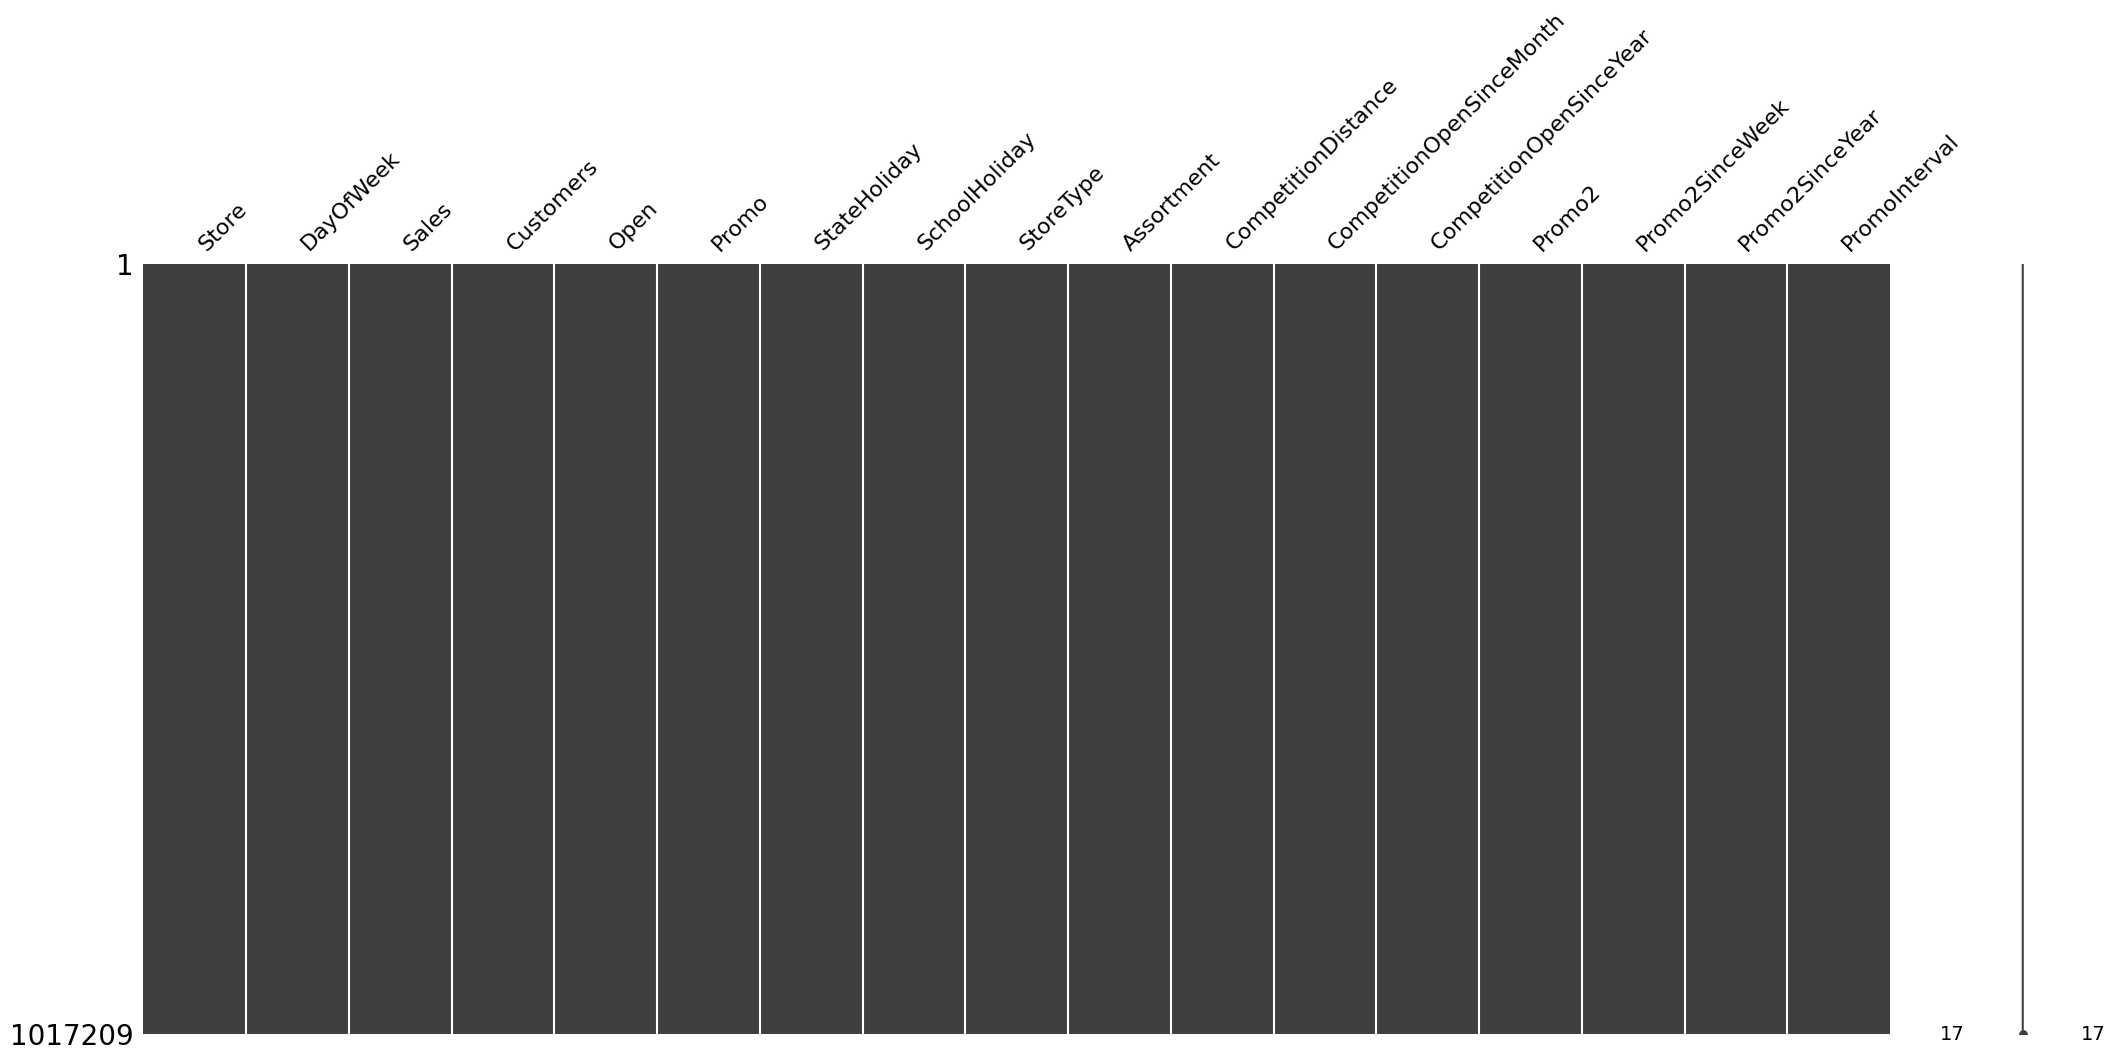

In [ ]:
# Visualzing Null Values after treatment
msno.matrix(df)

### What did you know about your dataset?

####1) Dataset_1 has 1017209 rows & 9 columns and Dataset_2 has 1115 rows & 10 columns after combining both, merged data set contains 1017209 rows & 18 columns.
####2) NaN values in variables 'CompetitionDistance',  'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear' are replaced by median since there is high possibilty of having competition stores & NaN values in variables  'Promo2SinceWeek', 'Promo2SinceYear',  'PromoInterval' are replaced by 0 since those stores have not applied Promo2 yet.
####3) Dataset has no Duplicate values.
####4) Variables named 'Open', 'Promo', 'SchoolHoliday', 'Promo2' has boolean values.
####5) Dataset has timeline from 01/01/2013 to 31/07/2015.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include = 'all')

### Variables Description 


* #### Store - Unique Id for each store
* #### DayOfWeek - Days in a week (1-7)
* #### Date - Timeline of dataset (From 2013-01-01 to 2015-07-31)
* #### Sales - Turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### Promo - indicates whether a store is running a promo on that day
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened

* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns:
  print(f"Unique {i}'s count:{df[i].nunique()}")
  if i in df.columns:
    if(df[i].nunique() < 25):
      print(f"{df[i].unique()}\n")

### Checking & Handling outliers in dataset.

In [ ]:
# checking Outliers with seaborn boxplot
check_outlier=['Sales', 'Customers','CompetitionDistance', 'CompetitionOpenSinceMonth','CompetitionOpenSinceYear']
df_plot=df.copy()
df_plot=df_plot[df_plot['Sales']>0]
n =0
plt.figure(figsize=(15,10))
for i in check_outlier:
  if n<10:
    n=n+1
  plt.subplot(4,4,n)
  sns.boxplot(df_plot[i],whis=1.5)
  plt.title(i)
  plt.tight_layout()

* We are ignoring the statistical outliers because there might be higher sales & more customers in some stores due to the promotional events & keeping high sales values will be also helpful in better inventory management for the stores during peak time.

* Outliers in Competition Distance can be ignored as there might be few stores located very far away from our stores.

* Outliers in Competition open since year can be ignored as there might be few stores which are opened even before us.

## ***3. Data Wrangling***

### Data Wrangling Code

In [ ]:
# Using DataFrame.astype() function
df["Date"] = df["Date"].astype('datetime64[ns]')

#Extracting day from date and storing it in new column 'Day'.
df['Day'] = df['Date'].dt.day

#Extracting Month from date and storing it in new column 'Month'.
df['Month'] = df['Date'].dt.month

#Extracting Year from date and storing it in new column 'Year'.
df['Year'] = df['Date'].dt.year

# Covert State holiday from categorical to booleans for simplicity. 
df['StateHoliday'] = df['StateHoliday'].replace(['0','a','b','c'],[0,1,1,1])

In [ ]:
# Getting store counts based on store types.
Stores_by_types = dataset_2['StoreType'].value_counts().reset_index().rename(columns = {'index':'StoreType','StoreType':'Num of Stores'})
Stores_by_types

In [ ]:
# Getting store counts based on assortment.
Stores_by_assortment = dataset_2['Assortment'].value_counts().reset_index().rename(columns = {'index':'Assortment','Assortment':'Stores_count'})
Stores_by_assortment

In [ ]:
# Finding Relation Betwwwn Store type and Assortment
StoreType_and_Assorment = dataset_2.groupby(['StoreType','Assortment'])['Store'].count().reset_index().rename(columns = {'Store':'Stores_count'})
StoreType_and_Assorment

In [ ]:
# Getting total sales based on store types.
Sales_by_Storetype = df.groupby('StoreType')['Sales'].sum().reset_index().rename(columns = {'Sales':'Total_Sales'})
Sales_by_Storetype

In [ ]:
# Getting avg sales based on store types.
Avg_Sales_by_Storetype = df.groupby('StoreType')['Sales'].mean().reset_index().rename(columns = {'Sales':'Avg_Sales'})
Avg_Sales_by_Storetype

In [ ]:
# Getting avg sales based on Assortment types.
Avg_Sales_by_Assortment = df.groupby('Assortment')['Sales'].mean().reset_index().rename(columns = {'Sales':'Avg_Sales'})
Avg_Sales_by_Assortment

In [ ]:
# Getting total sales based on Assortment types.
Total_Sales_by_Assortment = df.groupby('Assortment')['Sales'].sum().reset_index().rename(columns = {'Sales':'total_Sales'})
Total_Sales_by_Assortment

In [ ]:
# Average Sales by Month
Avg_Sales_by_months = df.groupby('Month')['Sales'].mean().reset_index().rename(columns = {'Sales':'Avg_Sales'})
Avg_Sales_by_months

In [ ]:
# Store Open percentage on different days.
dw_vs_open = df.groupby('DayOfWeek')['Open'].mean().reset_index()
dw_vs_open['Open']=round(dw_vs_open['Open']*100,2)
dw_vs_open['Closed %']=100-dw_vs_open['Open']
dw_vs_open=dw_vs_open.rename(columns = {'Open':'Open %'})
dw_vs_open

In [ ]:
# stores open percentage on school holiday
SchoolH_vs_open = df.groupby('SchoolHoliday')['Open'].mean().reset_index()
SchoolH_vs_open

In [ ]:
# stores opened and sales on state holiday
StateH_vs_open = df.groupby(['StateHoliday','Open']).agg({'Open':'count','Sales':'sum'})
StateH_vs_open

In [ ]:
# Checking sales in month of christmas holidays
Sales_in_DEC = df[df['Month']==12].groupby('Day')['Sales'].sum().reset_index().rename(columns = {'Sales':'Total_Sales'})
Sales_in_DEC

### What all manipulations have you done?


* Variable named 'Stateholiday' is categorical with '0',0, a,b,c which is converted into a boolean datatype for simplicity in EDA & model building.
* Date column was in object type which was converted to DateTime.
* From the Date Column we have extracted the days, months & years by making separate columns for each.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [ ]:
#Created a function to plot barplots when column is passed using plotly.
def bar_plot_Sales(a):
  y=df.groupby(a)['Sales'].mean().sort_values().reset_index()
  fig = x.bar(y, x=a,y="Sales",title=a +' wise average sales',color=a, height=500,width=700)
  fig.show()

#### Chart - 1

In [ ]:
# Stores count based on type
fig = x.pie(Stores_by_types, values='Num of Stores', names=['a','d','c','b'],title='Stores count based on type')
fig.update_layout(autosize=True,width=750,height=600)

##### 1. Why did you pick the specific chart?

* The pie chart is visually striking and easy to understand.
The pie chart gives us an idea of the relative proportion for each category of data at a single glance and permits a visual check of the reasonableness or accuracy of calculations.

##### 2. What is/are the insight(s) found from the chart?

* Store type A has maximum number of stores where as B has least.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

* Very few B type stores are present which can be increased.

#### Chart - 2

In [ ]:
# Number of Stores based on Assortment
fig = px.Figure(data=[px.Pie(labels=['a','c','b'],values= Stores_by_assortment['Stores_count'], hole=.5)])
fig.update_layout(autosize=False,width=700,height=500,title='Stores count based on Assortment',legend_title_text = 'Assortment')
fig.show()

##### 1. Why did you pick the specific chart?

* Donut charts are used to show the proportions of categorical data, with the size of each piece representing the proportion of each category.

##### 2. What is/are the insight(s) found from the chart?

* According to the chart assortment type A has maximum number of stores where Type B has minimum.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

* B type assortment are very less which can be increased as per the customer demand.

#### Chart - 3

In [ ]:
# Store type vs Assortment

# Reshape the data into a pivot table format for plotting
pivot_df = StoreType_and_Assorment.pivot_table(index='StoreType', columns='Assortment', values='Stores_count', fill_value=0)

# Create the stacked bar plot
fig = px.Figure(data=[
    px.Bar(name='Assortment a', x=pivot_df.index, y=pivot_df['a']),
    px.Bar(name='Assortment b', x=pivot_df.index, y=pivot_df['b']),
    px.Bar(name='Assortment c', x=pivot_df.index, y=pivot_df['c'])
])

# Update the layout of the plot
fig.update_layout(title='StoreType vs Assortment', barmode='stack',xaxis_title='Store Type',yaxis_title='Stores Count',)

# Show the plot
fig.show()

##### 1. Why did you pick the specific chart?

* Stacked Bar charts are used to show how a larger category is divided into smaller subcategories and what the relationship of each part has on the total amount.

##### 2. What is/are the insight(s) found from the chart?

* Only B type store has all three types of Assortment, Remaining stores i.e. A,C,D have a & c assortments.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

* B type assortment can be extended to other type of stores as well.

#### Chart - 4

In [ ]:
# Checking outliers in CompetitionDistance.
fig = x.box(df, x='CompetitionDistance')
fig.update_layout(autosize=False,width=1000,height=450,title='Box plot of CompetitionDistance')
fig.show()

#####  Why did you pick the specific chart?

* Box plots are used to show distributions of numeric data values, especially when you want to compare them between multiple groups. They are built to provide high-level information at a glance, offering general information about a group of data’s symmetry, skew, variance, and outliers.

In [ ]:
#Created dataframe of Stores and Competition distance by using groupby on mean value of sales.
df_dist=df.groupby(['Store','CompetitionDistance'])['Sales'].mean().sort_values().reset_index()

# Regression Plot between Sales and Competition Distance
plt.figure(figsize=(6,4))
sns.regplot(x='CompetitionDistance',scatter_kws={"color": "salmon"}, line_kws={"color": "blue"},
                    y='Sales',
                    data=df_dist)
plt.show()

##### 1. Why did you pick the specific chart?

* Scatter plot with a regression line is a useful tool for visualizing and analyzing the relationship between two variables, assessing the goodness of fit of the regression model, and identifying any outliers or influential points in the data.

##### 2. What is/are the insight(s) found from the chart?

* The median of competition Distance is 2330m, Which clearly indicates the competition stores are not far away. Which may affect sales.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

* Stores, where the competition distance is more than 10000m, show that there is a monopoly of the store in that area. Also, there is not much demand in those areas which can be observed from the low average sales which might be the reason for the competition refraining from opening stores in these areas.

* Stores, where the competition distance is closer, can offer better prices of products that are available at competition stores.

#### Chart - 5

In [ ]:
#barplot for  sales across the DayofWeek.
bar_plot_Sales('DayOfWeek')

In [ ]:
# barplot for sales across the Year.
bar_plot_Sales("Year")

##### 1. Why did you pick the specific chart?

* Bar graph summarises the large set of data in simple visual form. It displays each category of data in the frequency distribution. It clarifies the trend of data better than the table. It helps in estimating the key values at a glance. As we are comparing customer churn rate with total number of customers so grouped bar chart is making it easy for visualizing data.

##### 2. What is/are the insight(s) found from the chart?

* The 7th day of week shows that sales is least which is due to closer of stores.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

* Some stores can plan to open on Sunday, because there will be very less competition and they'll be able to make more profit from the sales.

#### Chart - 6

In [ ]:
# barplot for Monthly Average Sales
bar_plot_Sales('Month')

##### 1. What is/are the insight(s) found from the chart?

* Monthly average sales are more in December which might be due to festive season.

##### 2. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

* In first 2 quarters, we saw a dip in sales, we can run promotion & deploy better marketing strategies to create awareness customers.

#### Chart - 7

In [ ]:
#barplot for Average sales by Store Type.
bar_plot_Sales('StoreType')

#Barplot for total sales by storetype
fig = x.bar(Sales_by_Storetype, x='StoreType',y='Total_Sales',title='Total Sales by Store Type',color='StoreType', height=500,width=900)
fig.show()

##### 1. What is/are the insight(s) found from the chart?

* Least number of stores comes under B store type where as average sales value maximum in it.

##### 2. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

* Average sales are maximum in B type Store but very few stores are present, So increasing B type stores will boost revenue.

#### Chart - 8

In [ ]:
# barplot for Average sales by Assortment.
bar_plot_Sales('Assortment')

#barplot for total sales by Assortment
fig = x.bar(Total_Sales_by_Assortment, x='Assortment',y='total_Sales',title='Total Sales by Assortment',color='Assortment', height=500,width=900)
fig.show()

##### 1. What is/are the insight(s) found from the chart?

* Total sales are minimum in assortment type B but average sales are maximum.
* Total sales are highest in assortment type A but average sales are lowest.

##### 2. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

* Assortment type B can be extended to more stores as the average sales are higher.

#### Chart - 9

In [ ]:
# barplot for average Sales for school holiday
bar_plot_Sales('SchoolHoliday')

# barplot for average Sales for school holiday
bar_plot_Sales('StateHoliday')

##### 1. What is/are the insight(s) found from the chart?

* The average sales are higher on School holidays as parents must be free to visit the stores.
* Average sales on state holidays are almost negligible as compared to non holiday days as most of the stores might be closed.

##### 2. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

* On Holidays people are more likely to visit stores, So offering promotions on those days might help in increasing revenue.

#### Chart - 10

In [ ]:
# Pointplot for total Sales in Month of December
plt.figure(figsize=(25,4))
sns.pointplot(x= 'Day', y= 'Total_Sales', data=Sales_in_DEC)
plt.title('Sales in Month of December')
plt.show()

##### 1. What is/are the insight(s) found from the chart?

* Weekly sales and customers peak at the mid-December. It may be guessed that people buy medicines in advance just before the shops close for the holiday season.

##### 2. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

* Some stores can be planned to open for emergence puposes as we serve in medical field.

#### Chart - 11

In [ ]:
# Average sales on Promo days
bar_plot_Sales('Promo')

# Average sales on Prom2 days
bar_plot_Sales('Promo2')

##### 1. What is/are the insight(s) found from the chart?

* There is significant increase in Sales during promo 1(promo) but trend got reversed during promo 2.

##### 2. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

* Promo 2 is a disaster and should be discontinued with immediate effect instead Promo 1 can be extended further.

#### Chart - 12

In [ ]:
#Percentage of stores open and closedduring different days
fig = px.Figure(data=[
    px.Bar(name = 'Open %', x=[1,2,3,4,5,6,7],y=dw_vs_open['Open %']),
    px.Bar(name = 'Close %', x=[1,2,3,4,5,6,7],y=dw_vs_open['Closed %'])])

fig.update_layout(width=900,height=500,barmode='group',title = 'Stores opening percentage on days of week')
fig.show()

##### 1. Why did you pick the specific chart?

* Grouped Bar graph summarises the large set of data in simple visual form. It displays each category of data in the frequency distribution. It clarifies the trend of data better than the table. It helps in estimating the key values at a glance. 

##### 2. What is/are the insight(s) found from the chart?

* Maximum number of stores are remains closed on 7th day of the week and maximum stores stay opened on day before.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

* Some stores can be opened on sunday as well as there will be lesser competition on that day.

#### Chart - 13

In [ ]:
# Plot between Sales and Competition Open Since year
plt.figure(figsize=(25,4))
sns.pointplot(x= 'CompetitionOpenSinceYear', y= 'Sales', data=df)
plt.title('Plot between Sales and Competition Open Since year')
plt.show()

In [ ]:
#Created dataframe using groupby of store and competition open since year with mean sales 
df_comp=df.groupby(['Store','CompetitionOpenSinceYear'])['Sales'].mean().sort_values().reset_index()

# Plot between Sales and Competition Open Since year
plt.figure(figsize=(6,4))
sns.regplot(x='CompetitionOpenSinceYear',scatter_kws={"color": "salmon"}, line_kws={"color": "blue"},
                    y='Sales',
                    data=df_comp)

##### 1. Why did you pick the specific chart?

* Show point estimates and errors using dot marks. A point plot represents an estimate of central tendency for a numeric variable by the position of the dot and provides some indication of the uncertainty around that estimate using error bars.

##### 2. What is/are the insight(s) found from the chart?

Competition in stores keeps on increasing every year down the line, especially after the year 2000 and older stores have relatively more impact on average sales of the store than relatively newer ones.

* With competition increasing every year, downward trend in Sales can be observed.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

* Where competition stores are nearby, better pricing statergy can be applied to retain the customers.

#### Chart - 14

In [ ]:
# Plot between Sales and Promo2 Since year
plt.figure(figsize=(25,4))
sns.pointplot(x= 'Promo2SinceYear', y= 'Sales', data=df)
plt.title('Plot between Sales and Promo2 Since year')
plt.show()

##### 1. What is/are the insight(s) found from the chart?

* With implementation promo2 downward trend of sales can be observed which clearly indicates promo2 is not working. 

##### 2. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

* Promo 2 should be discontinued with immediate effect.

#### Chart - 15 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(17,10))
corr_df = df.corr()
sns.heatmap(corr_df, vmin=-1, cmap='coolwarm', annot=True)
plt.show()

##### 1. Why did you pick the specific chart?

* Heatmaps are used to show relationships between two variables, one plotted on each axis. By observing how cell colors change across each axis, you can observe if there are any patterns in value for one or both variables.Since we want find relationship between diffrent variables in dataframe and heatmap can be one of the way to visualize it.

##### 2. What is/are the insight(s) found from the chart?

* Sales shows positive correlation with Customer, open & promo.
* Customer has positive correlation with open.
* Promo2, Promo2SinceWeek & Promo2SinceYear are highly correlated with each other.


#### Chart - 16 - Pair Plot 

In [ ]:
# Pair Plot visualization code
numeric_col = ['DayOfWeek', 'Customers','CompetitionDistance','CompetitionOpenSinceMonth',
              'CompetitionOpenSinceYear', 'Promo2SinceWeek','Promo2SinceYear']
g = sns.pairplot(df,x_vars = numeric_col,y_vars = 'Sales')
plt.show()

##### 1. Why did you pick the specific chart?

* A pairs plot allows us to see both distribution of single variables and relationships between two variables. Pair plots are a great method to identify trends for follow-up analysis and can be easily implemented in Python!

#### Insights from EDA

* Out of 1115 Stores given, 602 stores come under store type A, 348 stores come under type D, 148 stores in type C, and 17 stores in type B.
* Out of 1115 Stores given, 593 stores come under Assortment type A, 513 stores in Assortment type C, and 9 Assortment stores in type B.
* In the sales variable 172817 rows are with 0 sales.
* The median of competition Distance is 2330, Which clearly indicates the competition stores are not far away and the Highest value for competition distance is 75860.
* Maximum no. of sales are recorded on 1st day of week and minimum on 7th day of the week due to closer of maximum no. of stores.
* Assortment B is available only at store type B.
* The Average number of sales is maximum in B whereas total sales are maximum in A which indicates store type B may have high-value customers and the same goes with assortment types.
* We can observe that most of the stores remain closed during State Holidays. But it is interesting to note that the number of stores opened during School Holidays was more than that were opened during State Holidays.
* Promo 1 is, a relatively more successful event as the sales increased but promo 2 was a bit unsuccessful as sales decreased after the implementation.
* With competition increasing every year the sales saw a downward trend.
* Sales are positively correlated with the Number of Customers, Opening of stores & promo.
* Weekly sales and customers peak in mid-December just before the Christmas Holidays.


## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### **Hypothetical Statement - 1**

To check if mean competition distance affects average sales.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

<b> H0(null hypothesis):There is no significant difference in average sales with respect to average CompetitionDistance.

H1(alternate hypothesis):There is significant difference in average sales with respect to average CompetitionDistance(2330m).

#### 2. Perform an appropriate statistical test.

In [ ]:
#Finding P-value using one sample t-test
_,p_value=stats.ttest_1samp(a=df[df['CompetitionDistance']<2330]['Sales'],popmean=df['Sales'].mean(),alternative="two-sided")

#99% Confidence interval
if p_value < 0.01:
  print('We are rejecting null hypothesis')
else:
  print('We are accepting null hypothesis')  

Thus there is significant difference in average sales with respect to average CompetitionDistance(2330m)

##### Why did you choose the specific statistical test?

The one-sample t-test is a statistical procedure used to determine whether the mean value of a sample is statistically the same or different from the mean value of its parent population from which the sample was drawn.

### **Hypothetical Statement - 2**

To recheck if Promo was more successful than Promo2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

<b> H0(null hypothesis):There is no significant difference in average sales during Promo and Promo2 days.

H1(alternate hypothesis):Average sales is less during Promo2 days than Promo days.

#### 2. Perform an appropriate statistical test.

In [ ]:
#Finding P-value using one sample t-test
_,p_value=stats.ttest_1samp(a=df[df['Promo2']==1]['Sales'],popmean=df[df['Promo']==1]['Sales'].mean(),alternative="less")

#99% Confidence interval
if p_value < 0.01:
  print('We are rejecting null hypothesis')
else:
  print('We are accepting null hypothesis')  

Thus average sales in less during promo2 days than Promo days.

##### Which statistical test have you done to obtain P-Value?

One sample t-test

### **Hypothetical Statement - 3**

To recheck if there is a increase in sales during promo2 days.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

<b> H0(null hypothesis):There is no significant difference in average sales during Promo2 and non Promo2 days.

H1(alternate hypothesis):Average sales is less during Promo2 days than non Promo2 days.

#### 2. Perform an appropriate statistical test.

In [ ]:
#Finding P-value using one sample t-test
_,p_value=stats.ttest_1samp(a=df[df['Promo2']==1]['Sales'],popmean=df['Sales'].mean(),alternative="less")

#99% Confidence interval
if p_value < 0.01:
  print('We are rejecting null hypothesis')
else:
  print('We are accepting null hypothesis')  

Thus average sales is less during Promo2 than non Promo2 days

##### Which statistical test have you done to obtain P-Value?

One sample t-test

### **Hypothetical Statement - 4**

To recheck if there is a increase in sales during SchoolHoliday days.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

<b> H0(null hypothesis):There is no significant difference in average sales during SchoolHoliday and non SchoolHoliday days.

H1(alternate hypothesis):Average sales is more during SchoolHoliday days than non SchoolHoliday days.

#### 2. Perform an appropriate statistical test.

In [ ]:
#Finding P-value using one sample t-test
_,p_value=stats.ttest_1samp(a=df[df['SchoolHoliday']==1]['Sales'],popmean=df['Sales'].mean(),alternative="greater")

#99% Confidence interval
if p_value < 0.01:
  print('We are rejecting null hypothesis')
else:
  print('We are accepting null hypothesis')  

Thus average sales is greater during SchoolHoliday than non SchoolHoliday days.

##### Which statistical test have you done to obtain P-Value?

One sample t-test

### **Hypothetical Statement - 5**

To recheck if average sales is more in store type b.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

<b> H0(null hypothesis):There is no significant difference in average sales of Store type b and other stores.

H1(alternate hypothesis):Average sales is more in b type store than other stores.

#### 2. Perform an appropriate statistical test.

In [ ]:
#Finding P-value using one sample t-test
_,p_value=stats.ttest_1samp(a=df[df['StoreType']=='b']['Sales'],popmean=df['Sales'].mean(),alternative="greater")

#99% Confidence interval
if p_value < 0.01:
  print('We are rejecting null hypothesis')
else:
  print('We are accepting null hypothesis')  

Thus average sales is greater in b store type than other stores.

##### Which statistical test have you done to obtain P-Value?

One sample t-test

### **Hypothetical Statement - 6**

To recheck if average sales is more during december.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

<b> H0(null hypothesis):There is no significant difference in average sales of Store during the month of December and other month.

H1(alternate hypothesis):Average sales is more during the month of December than other month.

#### 2. Perform an appropriate statistical test.

In [ ]:
#Finding P-value using one sample t-test
_,p_value=stats.ttest_1samp(a=df[df['Month']==12]['Sales'],popmean=df['Sales'].mean(),alternative="greater")

#99% Confidence interval
if p_value < 0.01:
  print('We are rejecting null hypothesis')
else:
  print('We are accepting null hypothesis')  

Thus average sales more during the month of December than other months.

##### Which statistical test have you done to obtain P-Value?

One sample t-test

### **Hypothetical Statement - 7**

To check if there is a correlation between Competition Distance and Sales.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

<b> H0(null hypothesis): There is no significant correlation between Competition Distance and sales .


H1(alternate hypothesis): There is significant correlation between Competition Distance and sales.


#### 2. Perform an appropriate statistical test.


In [ ]:
# Performing Pearson's Correlation test
stat, p = pearsonr(df['Sales'], df['CompetitionDistance'])

#95% Confidence interval
if p > 0.05:
 print("Fail to Reject NUll Hypothesis")
else:
 print("Reject NUll Hypothesis")

Thus there is significant correlation between Competition Distance and sales.

##### Which statistical test have you done to obtain P-Value?

Pearson's Correlation test

##### Why did you choose the specific statistical test?

Pearson’s correlation coefficient is the test statistics that measures the statistical relationship, or association, between two continuous variables.  It is known as the best method of measuring the association between variables of interest because it is based on the method of covariance.  It gives information about the magnitude of the association, or correlation, as well as the direction of the relationship.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

# Have been already handled at the beginning of Data Wrangling.

In [ ]:
# created a copy for feature engineering & selection.
df1 = df.copy()

#### What all missing value imputation techniques have you used and why did you use those techniques?

* NaN values in variables 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear' are replaced by median due to the presence of outilers in data.

* NaN values in variables 'Promo2SinceWeek', 'Promo2SinceYear',  'PromoInterval' are replaced by 0 because where ever 'Promo2' was not given i.e. it had value 0 corresponding values in the mentioned variables were NaN.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
# Box plots are ploted at the beginning for checking outliers

##### What all outlier treatment techniques have you used and why did you use those techniques?

We are ignoring the statistical outliers beacause there might be higher sales & more number of customers in some stores due to the promotional events & it will be also helpful in inventory management.

### 3. Categorical Encoding

In [ ]:
# Encoding using get dummies method of pandas
df1 = pd.get_dummies(df1, columns=['PromoInterval','StoreType','Assortment'])

#### What all categorical encoding techniques have you used & why did you use those techniques?

* We have used One Hot Encoding because catagorical variables in the dataset are not ordinal hence label encoding is not possible.

In [ ]:
# Checking dataset after encoding
df1.head(3)

In [ ]:
# Checking dataset info after encoding
df1.info()

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# We have manupulated the variable state holiday in data wraingling part and converted a,b,c type of holidays into single holiday(as 1).

In [ ]:
# Checking linearity between dependent and independent variables.
df1_numeric = set(df.describe().columns) - {'Sales'} 

rows=4 
cols=4
counter=1
fig = plt.figure(figsize=(20, 15))
for col in df1_numeric:
    plt.subplot(rows,cols,counter)
    ax = fig.gca()
    correlation = round(df1[col].corr(df1['Sales']),2)
    plt.scatter(x=df1[col], y=df1['Sales'])
    plt.xlabel(col)
    plt.ylabel('Sales')
    plt.title('Sales vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df1[col], df1['Sales'], 1)
    y_hat = np.poly1d(z)(df1[col])
    plt.plot(df1[col], y_hat, "r--", lw=1)
    counter=counter+1
    plt.tight_layout()

In [ ]:
# Correlation
plt.figure(figsize=(25,14))
correlation = df1.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')
plt.show()

#### 2. Feature Selection

In [ ]:
# Function to calculate variance Inflation Factor of columns
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF']=round(vif['VIF'],2)

    return(vif)

In [ ]:
# Checking VIF.
calc_vif(df1[[i for i in df1.describe().columns if i not in ['Sales','Promo2SinceYear','StoreType_a','Assortment_a','CompetitionOpenSinceYear','Open','Year','PromoInterval_Feb,May,Aug,Nov','PromoInterval_Jan,Apr,Jul,Oct','PromoInterval_0']]])

##### What all feature selection methods have you used  and why?

* We have checked vif value for all indepandent variables and removed few of them to achive the score below 10.
* The remaining variables will be used for model building.

##### Which all features you found important and why?

* After analysing the variables we found the sales (dependent Variable) shows postive correlation with Promo and Customers.

### 5. Data Transformation

In [ ]:
# Checking distribution using distribution plot.
rows=2 
cols=2
counter=1
fig = plt.figure(figsize=(10,6))
for i in ['Sales','Customers','CompetitionDistance','CompetitionOpenSinceYear']:
  plt.subplot(rows,cols,counter)
  sns.distplot((df1[i]),color="y")
  counter=counter+1
  plt.tight_layout()
  

In [ ]:
#Checking for distribution of data using histogram
rows=2
cols=2
counter=1
fig = plt.figure(figsize=(10, 5))
for col in ['Sales','Customers','CompetitionDistance','CompetitionOpenSinceYear']: 
  plt.subplot(rows,cols,counter)
  ax = fig.gca()
  df1[col].hist(bins=50, ax = ax) 
  ax.axvline(df1[col].mean(), color = 'pink',linestyle='dashed', linewidth=2) 
  ax.axvline(df1[col].median(), color = 'red',linestyle='dashed', linewidth=2) 
  ax.set_title(col)
  counter=counter+1
  plt.tight_layout()


* Our CompetitionDistance,Sales and Customers column is right skewed.
* While our CompetitionOpenSinceYear is left skewed.

In [ ]:
# Droping Rows having sales zero.
print(f'No. of of rows before dropping rows where sales equals zero={df1.shape[0]}')

df1 = df1[(df1.Sales > 0)].reset_index(drop=True)

print(f'No. of of rows after dropping rows where sales equals zero={df1.shape[0]}')

print(f'Percentage of rows  dropped ={round(((1017209-df1.shape[0])/1017209)*100,2)}%')

In [ ]:
# Transform Your data
from sklearn import preprocessing
pt=preprocessing.PowerTransformer(copy=False)
df1[['Customers','CompetitionDistance','CompetitionOpenSinceYear']]=pt.fit_transform(df1[['Customers','CompetitionDistance','CompetitionOpenSinceYear']])

In [ ]:
#Checking for distribution of data
rows=2
cols=2
counter=1
fig = plt.figure(figsize=(10, 5))
for col in ['Customers','CompetitionDistance','CompetitionOpenSinceYear','Sales']: 
  plt.subplot(rows,cols,counter)
  ax = fig.gca()
  df1[col].hist(bins=50, ax = ax) 
  ax.axvline(df1[col].mean(), color = 'pink',linestyle='dashed', linewidth=2) 
  ax.axvline(df1[col].median(), color = 'red',linestyle='dashed', linewidth=2) 
  ax.set_title(col)
  counter=counter+1
  plt.tight_layout()

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

* On checking the distribution of sales we found the data skewed so we remove 0 Sales for our data to be normally distributed.
* We have used power transformation on variables 'Customers', 'CompetitionDistance', 'CompetitionOpenSinceYear' to tranform it into normal distribution.
* Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired.

* Currently, PowerTransformer supports the Box-Cox transform and the Yeo-Johnson transform. The optimal parameter for stabilizing variance and minimizing skewness is estimated through maximum likelihood.

* Box-Cox requires input data to be strictly positive, while Yeo-Johnson supports both positive or negative data.

### 6. Data Splitting

In [ ]:
# Selecting Indepandent variable.
X = df1[['Store', 'DayOfWeek', 'Customers', 'Promo','StateHoliday', 'SchoolHoliday', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'Promo2','Promo2SinceWeek', 'Month', 'PromoInterval_Mar,Jun,Sept,Dec', 
       'StoreType_b', 'StoreType_c', 'StoreType_d','Assortment_b', 'Assortment_c']].values

# Selecting Dependent variable.
y =  df1[['Sales']].values

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

##### What data splitting ratio have you used and why? 

We have splitted 80% of dataset into training data and 20% into testing data.

### 7. Data Scaling

In [ ]:
# Scaling data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### Which method have you used to scale you data and why?

* Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise normalization such as MinMax Scaling is usually used prior to model fitting.

## ***7. ML Model Implementation***

### ML Model - 1 - Linear Regression

In [ ]:
#Function for creating and predicting values
def model_predict(model_name,X_train,y_train):
  regressor = model_name

  # Fit the Algorithm
  regressor.fit(X_train, y_train)

  # Predicting on the test set
  y_pred_test = regressor.predict(X_test)

  return y_pred_test


In [ ]:
# Linear Regression Implementation using function

#Creating instance of model 
model=LinearRegression()

#Predicting on test set
y_pred_test_lr=model_predict(model_name=model,X_train=X_train,y_train=y_train)


In [ ]:
#Function to evaluate model MSE,RMSE,R2 and adjusted R2 scores
def model_evaluator(model_name,y_pred_test):

  # Calculating mean Squared Error
  MSE = mean_squared_error(y_test, y_pred_test)
  # print("MSE :" , MSE)

  # Calculating root Mean Squared Error
  RMSE = np.sqrt(MSE)
  # print("RMSE :" ,RMSE)

  # Calculating mean Absolute Error
  MAE = mean_absolute_error(y_test, y_pred_test)
  # print("MAE :" ,MAE)

  # Calculating R2 score
  r2 = r2_score(y_test,y_pred_test)
  # print("R2 :" ,r2)

  # Calculating adjusted R2
  Adjusted_R2 = 1-(1-r2_score(y_test,y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  # print("Adjusted R2 :",Adjusted_R2)


  #Storing model score in dictionary
  model_score={'MSE':round(MSE,2),'RMSE':round(RMSE,2),'MAE':round(MAE,2),'R2 score':r2,'Adjusted R2':Adjusted_R2}
  model_score=pd.DataFrame([model_score])
  model_score.rename(index={0:f'{model_name}'},inplace=True)
  return model_score


In [ ]:
#Calculating model scores using model_evaluator function
model_scores=model_evaluator(model_name='Linear Regression',y_pred_test=y_pred_test_lr)

In [ ]:
# Linear Regression Metric Score chart
model_scores

In [ ]:
#Function to perform cross validation 
#from sklearn.model_selection import cross_val_score

def Cross_val(model_name,X_train,X_test,y_train,y_test):
  #Creating instance of model
  clf = model_name

 #Calculating cross validation R2_score for checking model stability
  cv_score=cross_val_score(clf,X_train,y_train,cv=5,scoring='r2')

  #Calculating mean of R2 score
  mean_CV_R2_score=np.mean(cv_score)
  
  return mean_CV_R2_score

In [ ]:
#Performing cross validation
mean_CV_R2_score=Cross_val(model,X_train,X_test,y_train,y_test)

#Storing Mean CV_Score in dataframe
model_scores['Mean CV_Score']=mean_CV_R2_score
model_scores

In [ ]:
#Function to plot actual vs predicted value of each store

def predict_vs_actual(y_test,y_pred_test):
  #Applying inverse transform on x_test
  X_test_Inv_transformed=scaler.inverse_transform(X_test)

  #Converting transformed array into dataframe
  df_plot = pd. DataFrame(X_test_Inv_transformed, columns=['Store', 'DayOfWeek', 'Customers', 'Promo','StateHoliday', 'SchoolHoliday',
                                                         'CompetitionDistance','CompetitionOpenSinceMonth', 'Promo2','Promo2SinceWeek',
                                                         'Month', 'PromoInterval_Mar,Jun,Sept,Dec', 'StoreType_b', 'StoreType_c',
                                                         'StoreType_d','Assortment_b', 'Assortment_c']) 
  
  #Adding actual sales vs predicted sales to dataframe
  df_plot["sales"] = y_test
  df_plot["predictions"] = y_pred_test

  #Calculating  actual sales and predicted sales of all stores 
  df_plot = df_plot[["Store", "predictions","sales"]].groupby("Store").mean().reset_index()
  plt.figure(figsize=(20,4))
  plt.plot(df_plot["predictions"])
  plt.plot(df_plot["sales"])
  plt.legend(["Predicted","Actual"])
  plt.show()


In [ ]:
#visualizing actual vs predicted value
predict_vs_actual(y_test,y_pred_test=y_pred_test_lr)

In [ ]:
#Function to plot of error in prediction of each store

def error_visualizer(X_test,y_test,y_pred_test):
  #Applying inverse transform on x_test
  X_test_Inv_transformed=scaler.inverse_transform(X_test)

  #Converting transformed array into dataframe
  df_plot = pd. DataFrame(X_test_Inv_transformed, columns=['Store', 'DayOfWeek', 'Customers', 'Promo','StateHoliday', 'SchoolHoliday',
                                                         'CompetitionDistance','CompetitionOpenSinceMonth', 'Promo2','Promo2SinceWeek',
                                                         'Month', 'PromoInterval_Mar,Jun,Sept,Dec', 'StoreType_b', 'StoreType_c',
                                                         'StoreType_d','Assortment_b', 'Assortment_c']) 
  
  #Adding actual sales vs predicted sales to dataframe
  df_plot["sales"] = y_test
  df_plot["predictions"] = y_pred_test

  #Calculating  actual sales and predicted sales of all stores 
  df_plot = df_plot[["Store", "predictions","sales"]].groupby("Store").mean().reset_index()

  #Creating new error column 
  df_plot['Error']=df_plot['sales']-df_plot['predictions']

  #Plotting error
  plt.figure(figsize=(20,4))
  sns.lineplot(x="Store", y="Error", data=df_plot)
  plt.axhline(1, linestyle="--")
  plt.show()

In [ ]:
#Visializing error of linear regression model.
error_visualizer(X_test=X_test,y_test=y_test,y_pred_test=y_pred_test_lr)

### ML Model - 2 - Lasso Regression

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Lasso Regression Implementation

#Creating instance of model.
model=Lasso()

#Predicting on test set.
y_pred_test_lasso=model_predict(model_name=model,X_train=X_train,y_train=y_train)

In [ ]:
# Lasso Regression Metric Score chart
result=model_evaluator(model_name='Lasso',y_pred_test=y_pred_test_lasso)

In [ ]:
#Performing cross validation
mean_CV_R2_score=Cross_val(model,X_train,X_test,y_train,y_test)

#Storing Mean CV_Score in dataframe
result['Mean CV_Score']=mean_CV_R2_score

#Concating two with result dataframe
model_scores=pd.concat([model_scores, result], axis=0, join='inner')
model_scores

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
#Function to perform hyper parameter tuning using grid search cv for simple models
def Tuning_Grid_Search(model_name,parameters,X_train,X_test,y_train,y_test):

  #creating instance of regression model 
  reg_model=model_name

  #Tuning parameters using grid search cv
  gs = GridSearchCV(reg_model, parameters, scoring='r2', cv=3,refit=True)

  #fitting model
  model_fit=gs.fit(X_train, y_train)

  #Predicting 
  y_pred = gs.predict(X_test)

  #Storing best parameters 
  scores={'best_parameter':gs.best_params_,f'{model_name} R2 score': gs.best_score_}
  df = pd.DataFrame.from_dict(scores),model_fit

  return df,gs

In [ ]:
#Function to perform hyper parameter tuning using randomized search cv for complicated models
def Tuning_Random_Search(model_name,parameters,X_train,X_test,y_train,y_test):

  #creating instance of regression model 
  reg_model=model_name

  #Tuning parameters using grid search cv
  gs = RandomizedSearchCV(reg_model, parameters, scoring='r2', cv=3,refit=True)

  #fitting model
  model_fit=gs.fit(X_train, y_train)

  #Predicting 
  y_pred = gs.predict(X_test)

  #Storing best parameters 
  scores={'best_parameter':gs.best_params_,f'{model_name} R2 score': gs.best_score_}
  df = pd.DataFrame.from_dict(scores),model_fit

  return df,gs

In [ ]:
# Lasso Regression Implementation with hyperparameter optimization techniques (i.e. GridSearch CV)

#Creating instance of model 
model= Lasso()

#Paramater grid for hyperparameter tuning
parameter_grid = {'alpha': [0.0001,0.0002,0.001,0.002,0.01,0.02,0.1,0.2,0.3]}

#Grid search cv on lasso regression
tuned_model_score,model_tuned=Tuning_Grid_Search(model_name=model,parameters=parameter_grid,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)



In [ ]:
#Tuned model R2 Score and best estimator

#Print best parameter found along with cv score
tuned_model_score[0]

In [ ]:
# Predict on the model

#Predicting using tuned model
y_pred_lasso = model_tuned.predict(X_test)

In [ ]:
# Lasso Regression with GCV Metric Score chart
result=model_evaluator(model_name="Lasso_tuned",y_pred_test=y_pred_lasso)

#Performing cross validation
mean_CV_R2_score=Cross_val(model,X_train,X_test,y_train,y_test)

#Storing Mean CV_Score in dataframe
result['Mean CV_Score']=mean_CV_R2_score

#Storing result in dataframe
model_scores=pd.concat([model_scores, result], axis=0, join='inner')
model_scores


##### Which hyperparameter optimization technique have you used and why?

* Grid Search is an effective method for adjusting the parameters in supervised learning and improve the generalization performance of a model. With Grid Search, we try all possible combinations of the parameters of interest and find the best ones.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

* No significant improvement has been observed.

### ML Model - 3 - Ridge Regression

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Ridge Regression Implementation

#Creating instance of model 
model = Ridge()

#Predicting on test set
y_pred_test_ridge=model_predict(model_name=model,X_train=X_train,y_train=y_train)

In [ ]:
# Ridge Regression Metric Score chart
result=model_evaluator(model_name='ridge',y_pred_test=y_pred_test_ridge)

#Performing cross validation
mean_CV_R2_score=Cross_val(model,X_train,X_test,y_train,y_test)

#Storing Mean CV_Score in dataframe
result['Mean CV_Score']=mean_CV_R2_score

#concating with model_scores with result dataframe
model_scores=pd.concat([model_scores, result], axis=0, join='inner')
model_scores

In [ ]:
#Plot of actual vs predicted value

#Plotting actual vs predicted values of each stores
predict_vs_actual(y_test,y_pred_test=y_pred_test_ridge)

In [ ]:
#Plot of error in prediction i.e difference in actual vs predicted value
error_visualizer(X_test=X_test,y_test=y_test,y_pred_test=y_pred_test_ridge)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Lasso Regression Implementation with hyperparameter optimization techniques (i.e. GridSearch CV)

#Creating instance of model 
model = Ridge()

#Parameters for hyperparameter tuning
parameter_grid = {'alpha': [0.01,0.02,0.03,0.04,0.05,0.1,0.2,0.3,0.4,0.5,1,2,3]}

#Grid search cv on lasso regression
tuned_model_score,model_tuned=Tuning_Grid_Search(model_name=model,parameters=parameter_grid,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)


In [ ]:
# Best alpha Value

#Print best parameters with cv score
tuned_model_score[0]

In [ ]:
# Predict on the model

#Predicting using tuned model
y_pred_ridge = model_tuned.predict(X_test)

In [ ]:
# Ridge Regression with GCV Metric Score chart

#Evaluating created model
result=model_evaluator(model_name='ridge_tuned',y_pred_test=y_pred_ridge)

#Performing cross validation
mean_CV_R2_score=Cross_val(model,X_train,X_test,y_train,y_test)

#Storing Mean CV_Score in dataframe
result['Mean CV_Score']=mean_CV_R2_score

#concating two dataframe
model_scores=pd.concat([model_scores, result], axis=0, join='inner')
model_scores

##### Which hyperparameter optimization technique have you used and why?

* Grid Search is an effective method for adjusting the parameters in supervised learning and improve the generalization performance of a model. With Grid Search, we try all possible combinations of the parameters of interest and find the best ones.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

* No significant improvement has been observed.

#### To understand which model will give us best result.

In [ ]:
## Using AutoML library to select best model from ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']

#10min execution time 

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 500,  # in seconds
    "metric": 'r2',
    "task": 'regression',
    "log_file_name": "retail.log",
}

# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings)

#Saving automl model
automl_model=automl.model
# Export the best model
print(automl.model)

### ML Model - 4 - Decision Tree Regression

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
#Creating instance of model 
model=DecisionTreeRegressor()

#Predicting on test set
y_pred_test_dt=model_predict(model_name=model,X_train=X_train,y_train=y_train)

In [ ]:
#Decision tree Metric Score chart
result=model_evaluator(model_name='Decision tree',y_pred_test=y_pred_test_dt)

#Performing cross validation
mean_CV_R2_score=Cross_val(model,X_train,X_test,y_train,y_test)

#Storing Mean CV_Score in dataframe
result['Mean CV_Score']=mean_CV_R2_score

#Conacating two dataframe
model_scores=pd.concat([model_scores, result], axis=0, join='inner')
model_scores



In [ ]:
#Plot of actual vs predicted value
predict_vs_actual(y_test,y_pred_test=y_pred_test_dt)

In [ ]:
#Plot of error in prediction i.e difference in actual vs predicted value
error_visualizer(X_test=X_test,y_test=y_test,y_pred_test=y_pred_test_dt)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
#Hyperparameter Tuning using Randomized search cv

#Parameters for hyperparameter tuning 
dt_params_grid= { 'max_depth' : [2,3,5,10,20,30],
               'min_samples_leaf' : [5,10,20,50,100]}

#Creating instance of model
model_name=DecisionTreeRegressor()

#Applying randomised search cv
tuned_model_score,model_tuned=Tuning_Random_Search(model_name=model_name,parameters=dt_params_grid,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

In [ ]:
# Best alpha Value

#Printing best parameters along with cv score.
tuned_model_score[0]

In [ ]:
# Predict on the model
y_pred_dt = model_tuned.predict(X_test)

In [ ]:
# Decision Tree Regression with GCV Metric Score chart

#Evaluating created model
result=model_evaluator(model_name='Decision Tree Tuned',y_pred_test=y_pred_dt)

#Performing cross validation
mean_CV_R2_score=Cross_val(model,X_train,X_test,y_train,y_test)

#Storing Mean CV_Score in dataframe
result['Mean CV_Score']=mean_CV_R2_score

#Concating two dataframe
model_scores=pd.concat([model_scores, result], axis=0, join='inner')
model_scores


In [ ]:
#Plot of actual vs predicted value
error_visualizer(X_test=X_test,y_test=y_test,y_pred_test=y_pred_dt)


##### Which hyperparameter optimization technique have you used and why?

* RandomSearchCV has the same purpose of GridSearchCV, they both are designed to find best parameters to improve the model. However, here not all parameters are tested. Rather, the search is randomized and all the other parameters are held constant while the parameters we are testing is variable.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.


* Very less improvement have been observed.

### ML Model - 5 - Extra Tree Regression

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
#Extra tree regressor implementation

#Creating instance using AUTOML library
etr=ExtraTreesRegressor(max_features=0.6490475444011059, max_leaf_nodes=3146,
                    n_estimators=4, n_jobs=-1, random_state=12032022)

#Predicting on test set.
y_pred_test_etr=model_predict(model_name=etr,X_train=X_train,y_train=y_train)

In [ ]:
#Extra tree Regressor Metric Score chart
result=model_evaluator(model_name='Extra tree Regressor',y_pred_test=y_pred_test_etr)

#Performing cross validation 
mean_CV_R2_score=Cross_val(etr,X_train,X_test,y_train,y_test)

#Storing Mean CV_Score in dataframe
result['Mean CV_Score']=mean_CV_R2_score

#storing result in dataframe
model_scores=pd.concat([model_scores, result], axis=0, join='inner')
model_scores


In [ ]:
#Plot of actual vs predicted value
predict_vs_actual(y_test,y_pred_test=y_pred_test_etr)

In [ ]:
#Visualizing error i.e difference in actual vs predicted value
error_visualizer(X_test=X_test,y_test=y_test,y_pred_test=y_pred_test_etr)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
#Hyperparameter Tuning using Randomized search cv

# param_grid_etr={
#         'n_estimators': range(50,126,25),
#         'max_features': range(50,401,50),
#         'min_samples_leaf': range(20,50,5),
#         'min_samples_split': range(15,36,5),
#     }

#Creating instance of model

# model_name=ExtraTreesRegressor()

# #Tuning using randomised search
# tuned_model_score,model_tuned=Tuning_Random_Search(model_name=model_name,parameters=param_grid_etr,
#                                                    X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

In [ ]:
# Best alpha Value using randomised search cv
#tuned_model_score[0]

'''

-----------------------------------------------------
-----------------Best Parameters--------------------- 


best_parameter	ExtraTreesRegressor()    R2 score
max_features	           300	           0.941254
min_samples_leaf	       25	             0.941254
min_samples_split	       30	             0.941254
n_estimators	           125	           0.941254

'''

In [ ]:
#Extra tree regressor implementation using best parameters
etr_tuned=ExtraTreesRegressor(max_features=300, min_samples_leaf=25,
                    min_samples_split=30, n_estimators=125)

#Predicting on test set
y_pred_test_etr=model_predict(model_name=etr_tuned,X_train=X_train,y_train=y_train)

In [ ]:
#Extra tree Regressor Metric Score chart
result=model_evaluator(model_name='Tuned Extra tree Regressor',y_pred_test=y_pred_test_etr)

'''
takes 27 min
#Performing cross validation
mean_CV_R2_score=Cross_val(etr_tuned,X_train,X_test,y_train,y_test)

#Storing Mean CV_Score in dataframe
result['Mean CV_Score']=mean_CV_R2_score

'''
#Storing Mean CV_Score in dataframe
result['Mean CV_Score']=0.945731

#storing result in dataframe
model_scores=pd.concat([model_scores, result], axis=0, join='inner')
model_scores


##### Which hyperparameter optimization technique have you used and why?

* RandomSearchCV has the same purpose of GridSearchCV, they both are designed to find best parameters to improve the model. However, here not all parameters are tested. Rather, the search is randomized and all the other parameters are held constant while the parameters we are testing is variable.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

* Yes, improvement can be seen in the tuned model as MSE, MAE have decreased & R2 Score of prediction has increased.

### ML Model - 6 - XG Boost Regression

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# XG Boost Regression

#Creating instance of model
xgb_reg = xgb.XGBRegressor(n_estimators =100,max_depth=8)

#Predicting on test set
y_pred_test_xgb=model_predict(model_name=xgb_reg,X_train=X_train,y_train=y_train)

In [ ]:
#XG Boost Regression Metric Score chart

#execution time=10min
result=model_evaluator(model_name='XG Boost Regression',y_pred_test=y_pred_test_xgb)

#Performing cross validation
mean_CV_R2_score=Cross_val(xgb_reg,X_train,X_test,y_train,y_test)

#Storing Mean CV_Score in dataframe
result['Mean CV_Score']=mean_CV_R2_score

#storing result in dataframe
model_scores=pd.concat([model_scores, result], axis=0, join='inner')
model_scores


In [ ]:
# PLot between Predicted and Actual Values 
predict_vs_actual(y_test,y_pred_test=y_pred_test_xgb)

In [ ]:
#Plot of error in prediction i.e difference in actual vs predicted value.
error_visualizer(X_test=X_test,y_test=y_test,y_pred_test=y_pred_test_xgb)

In [ ]:
'''
Takes Approx 1hr 35min for finding best parameters
#Hyper parameter tuning of XGboost model using randomized search cv.
xgb_grid={'learning_rate':[0.3,0.5,1],
                'max_depth':[10,15],
                'min_child_weight':[0.5,1],
                'n_estimators':[500]}

model_name=xgb.XGBRegressor()

#Tuning using randomised search
tuned_model_score,model_tuned=Tuning_Random_Search(model_name=model_name,parameters=xgb_grid,
                                                   X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

# Best alpha Value using randomised search cv
tuned_model_score[0]


-------------------------------------
------------Best Parameters----------

learning_rate	    0.3	    0.976285
max_depth	        10.0	  0.976285
min_child_weight	0.5	    0.976285
n_estimators	    500.0	  0.976285 
                                                 

'''

In [ ]:
#Implementing model using best parameters

#10min execution time

#Creating instance of tuned model
xgb_reg = xgb.XGBRegressor(learning_rate=0.3,max_depth=10,n_estimators =500,min_child_weight=0.5)

#Predicted on test set.
y_pred_test_xgb=model_predict(model_name=xgb_reg,X_train=X_train,y_train=y_train)

In [ ]:
#XG Boost Regression Metric Score chart
result=model_evaluator(model_name='XG Boost Regression tuned',y_pred_test=y_pred_test_xgb)

"""
#Takes 1hr 15min

#Performing cross validation
mean_CV_R2_score=Cross_val(xgb_reg,X_train,X_test,y_train,y_test)

"""

#Storing Mean CV_Score in dataframe obtained from cross validation
result['Mean CV_Score']=0.976880

#storing result in dataframe
model_scores=pd.concat([model_scores, result], axis=0, join='inner')
model_scores

### ML Model - 7 - Light GBM Regression

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Light GBM Regression

#Creating instance of model.
lgbm_reg = LGBMRegressor()

#Predicting on test set.
y_pred_test_lgbm=model_predict(model_name=lgbm_reg,X_train=X_train,y_train=y_train)

In [ ]:
# Visualizing evaluation Metric Score chart
result=model_evaluator(model_name='LGBMRegressor',y_pred_test=y_pred_test_lgbm)

#Performing cross validation
mean_CV_R2_score=Cross_val(lgbm_reg,X_train,X_test,y_train,y_test)

#Storing Mean CV_Score in dataframe
result['Mean CV_Score']=mean_CV_R2_score

#Concating two dataframe
model_scores=pd.concat([model_scores, result], axis=0, join='inner')
model_scores

In [ ]:
#Plot of actual vs predicted value
predict_vs_actual(y_test,y_pred_test=y_pred_test_lgbm)

In [ ]:
#Plot of error in prediction i.e difference in actual vs predicted value.}
error_visualizer(X_test=X_test,y_test=y_test,y_pred_test=y_pred_test_lgbm)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
"""
Takes Approx 2hrs for finding best parameters
#Hyper parameter tuning of LGB model using randomized search cv.

lgb_grid = {'task' : ['predict'],'boosting': ['gbdt' ],'objective': ['root_mean_squared_error'],
                        'num_iterations': [  1500, 2000,5000  ],'learning_rate':[  0.05, 0.005 ],'num_leaves':[ 7, 15, 31  ],
                        'max_depth' :[ 10,15,25],'min_data_in_leaf':[15,25 ],
                        'feature_fraction': [ 0.6, 0.8,  0.9],
                        'bagging_fraction': [  0.6, 0.8 ],
                        'bagging_freq': [   100, 200, 400  ]
                        }


model_name=LGBMRegressor()

#Tuning using randomised search
tuned_model_score,model_tuned=Tuning_Random_Search(model_name=model_name,parameters=lgb_grid,
                                                   X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)

----------------------------------------------------------------
--------------------Best Parameters-----------------------------  


best_parameter	     LGBMRegressor()                   R2 score
bagging_fraction	          0.8	                       0.975734
bagging_freq	              200	                       0.975734
boosting	                  gbdt                       0.975734
feature_fraction          	0.8	                       0.975734
learning_rate             	0.05                       0.975734
max_depth                 	15	                       0.975734
min_data_in_leaf	          15                         0.975734
num_iterations	           2000	                       0.975734
num_leaves	                31	                       0.975734
objective	         root_mean_squared_error	           0.975734
task	                    predict	                     0.975734

"""



In [ ]:
#Implementing model using best parameters
lgbm_reg_tuned = LGBMRegressor(bagging_fraction=0.8,bagging_freq=200,boosting='gbdt',feature_fraction=0.8,verbose=-1,
                        learning_rate=0.05,max_depth=15,min_data_in_leaf=15,num_iterations=2000,num_leaves=31,objective='root_mean_squared_error',task='predict'	    
                        )
y_pred_test_lgbm=model_predict(model_name=lgbm_reg_tuned,X_train=X_train,y_train=y_train)

In [ ]:
#LGBM Regressor Metric Score chart

#(10 min execution time)
result=model_evaluator(model_name='LGBM Regression tuned',y_pred_test=y_pred_test_lgbm)

#Performing cross validation
mean_CV_R2_score=Cross_val(lgbm_reg_tuned,X_train,X_test,y_train,y_test)

#Storing Mean CV_Score in dataframe
result['Mean CV_Score']=mean_CV_R2_score

#storing result in dataframe
model_scores=pd.concat([model_scores, result], axis=0, join='inner')
model_scores

##### Which hyperparameter optimization technique have you used and why?

* RandomSearchCV has the same purpose of GridSearchCV, they both are designed to find best parameters to improve the model. However, here not all parameters are tested. Rather, the search is randomized and all the other parameters are held constant while the parameters we are testing is variable.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

* Yes, improvement can be seen in the tuned model as MSE, MAE have decreased & R2 Score of prediction has increased.

#Using Parameters provided by AutoML library

In [ ]:
#Implementing model using parameters provided by AutoML library
lgbm_reg_automl = LGBMRegressor(colsample_bytree=0.6005311588859247,
              learning_rate=0.17412176672580496, max_bin=255,
              min_child_samples=3, n_estimators=437, num_leaves=339,
              reg_alpha=0.09241149250114443, reg_lambda=0.035952475697498154,
              verbose=-1)
y_pred_test_lgbm=model_predict(model_name=lgbm_reg_automl,X_train=X_train,y_train=y_train)

In [ ]:
#LGBM Regression Metric Score chart

#(10 min execution time)
result=model_evaluator(model_name='LGBM Regression AutoML',y_pred_test=y_pred_test_lgbm)

#Performing cross validation
mean_CV_R2_score=Cross_val(lgbm_reg_automl,X_train,X_test,y_train,y_test)

#Storing Mean CV_Score in dataframe
result['Mean CV_Score']=mean_CV_R2_score

#storing result in dataframe
model_scores=pd.concat([model_scores, result], axis=0, join='inner')
model_scores

In [ ]:
#Plot of error in prediction i.e difference in actual vs predicted value.}
error_visualizer(X_test=X_test,y_test=y_test,y_pred_test=y_pred_test_lgbm)

### 1) Which ML model did you choose from the above created models as your final prediction model and why?

In [ ]:
model_scores

> AutoML LGBM Regression model gives us the best results with least error metrics and highest R-Squared value.





### 2) Which Evaluation metrics did you consider for a positive business impact and why?

We have considered Mean Absolute Error & Adjusted R-Squared as optimum metrics because
* The MAE you get is in the same unit as the output variable & it is most Robust to outliers.
* When we add an irrelevant feature in the dataset then at that time R2 sometimes starts increasing which is incorrect this problem is solved by adjusted R2, Hence, this metric becomes one of the most important metrics to use during the evaluation of the model.

### 3) Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:
#Checking Importance of Features
features=['Store', 'DayOfWeek', 'Customers', 'Promo','StateHoliday', 'SchoolHoliday', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'Promo2','Promo2SinceWeek', 'Month', 'PromoInterval_Mar,Jun,Sept,Dec', 
       'StoreType_b', 'StoreType_c', 'StoreType_d','Assortment_b', 'Assortment_c']

#creating dataframe of features and sorting them according to their importance.      
feature_imp = pd.DataFrame(sorted(zip(lgbm_reg_automl.feature_importances_,features)), columns=['Value','Feature'])
 
plt.figure(figsize=(20, 8))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

> Top 3 features in the model are Customers,	Store & Month.

#<b>Implementing Time series using FBProphet

In [ ]:
df_ts.head(2)

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      1          4  2015-07-30   5020        546     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         c          a               1270.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                        9.0                    2008.0       0   

   Promo2SinceWeek  Promo2SinceYear PromoInterval  
0              0.0              0.0             0  
1              0.0              0.0             0

In [ ]:
df=df_ts.copy()

In [ ]:
df.head(2)

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      1          4  2015-07-30   5020        546     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         c          a               1270.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                        9.0                    2008.0       0   

   Promo2SinceWeek  Promo2SinceYear PromoInterval  
0              0.0              0.0             0  
1              0.0              0.0             0

In [ ]:
df.set_index('Date',inplace=True)

In [ ]:
df.head(2)

Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
Date                                                                       
2015-07-31      1          5   5263        555     1      1            0   
2015-07-30      1          4   5020        546     1      1            0   

            SchoolHoliday StoreType Assortment  CompetitionDistance  \
Date                                                                  
2015-07-31              1         c          a               1270.0   
2015-07-30              1         c          a               1270.0   

            CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
Date                                                                      
2015-07-31                        9.0                    2008.0       0   
2015-07-30                        9.0                    2008.0       0   

            Promo2SinceWeek  Promo2SinceYear PromoInterval  
Date                                                        
2015-07-31              0.0              0.0             0  
2015-07-30              0.0              0.0             0

<Axes: xlabel='Date'>

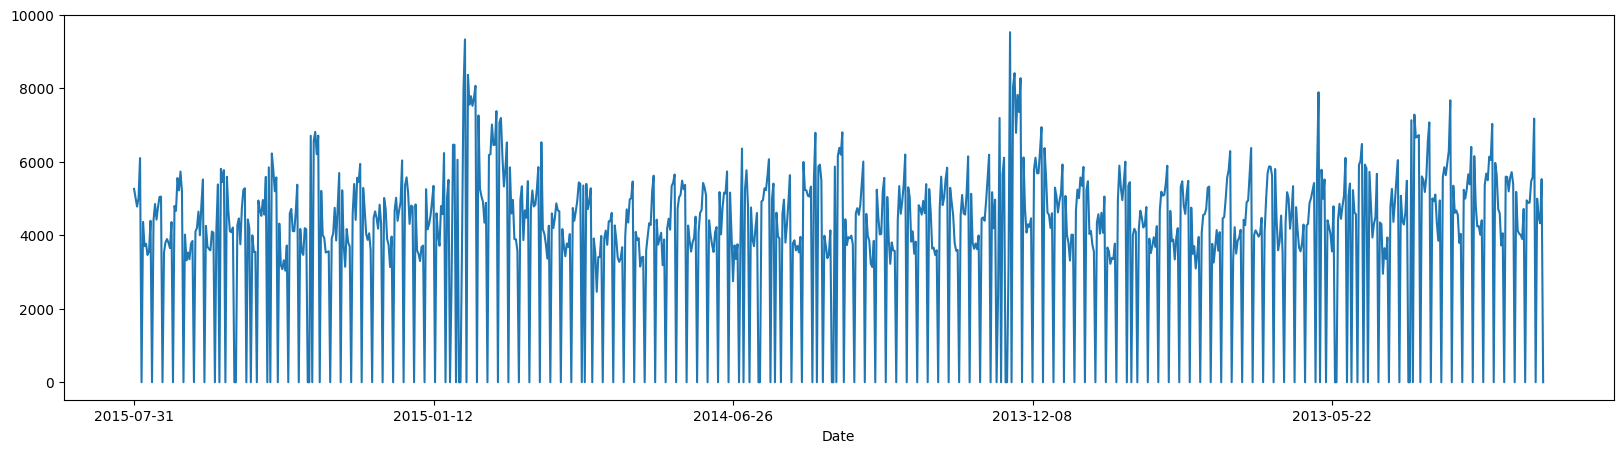

In [ ]:
df[df['Store']==1]['Sales'].plot(figsize=(20,5))

In [ ]:
df_copy=df[df['Store']==1].copy()

In [ ]:
df_copy.rename(columns={'Date': 'ds', 'Sales': 'y'}, inplace=True)

In [ ]:
df_copy

Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
Date                                                                       
2015-07-31      1          5   5263        555     1      1            0   
2015-07-30      1          4   5020        546     1      1            0   
2015-07-29      1          3   4782        523     1      1            0   
2015-07-28      1          2   5011        560     1      1            0   
2015-07-27      1          1   6102        612     1      1            0   
...           ...        ...    ...        ...   ...    ...          ...   
2013-01-05      1          6   4997        635     1      0            0   
2013-01-04      1          5   4486        619     1      0            0   
2013-01-03      1          4   4327        578     1      0            0   
2013-01-02      1          3   5530        668     1      0            0   
2013-01-01      1          2      0          0     0      0            a   

            SchoolHoliday StoreType Assortment  CompetitionDistance  \
Date                                                                  
2015-07-31              1         c          a               1270.0   
2015-07-30              1         c          a               1270.0   
2015-07-29              1         c          a               1270.0   
2015-07-28              1         c          a               1270.0   
2015-07-27              1         c          a               1270.0   
...                   ...       ...        ...                  ...   
2013-01-05              1         c          a               1270.0   
2013-01-04              1         c          a               1270.0   
2013-01-03              1         c          a               1270.0   
2013-01-02              1         c          a               1270.0   
2013-01-01              1         c          a               1270.0   

            CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
Date                                                                      
2015-07-31                        9.0                    2008.0       0   
2015-07-30                        9.0                    2008.0       0   
2015-07-29                        9.0                    2008.0       0   
2015-07-28                        9.0                    2008.0       0   
2015-07-27                        9.0                    2008.0       0   
...                               ...                       ...     ...   
2013-01-05                        9.0                    2008.0       0   
2013-01-04                        9.0                    2008.0       0   
2013-01-03                        9.0                    2008.0       0   
2013-01-02                        9.0                    2008.0       0   
2013-01-01                        9.0                    2008.0       0   

            Promo2SinceWeek  Promo2SinceYear PromoInterval  
Date                                                        
2015-07-31              0.0              0.0             0  
2015-07-30              0.0              0.0             0  
2015-07-29              0.0              0.0             0  
2015-07-28              0.0              0.0             0  
2015-07-27              0.0              0.0             0  
...                     ...              ...           ...  
2013-01-05              0.0              0.0             0  
2013-01-04              0.0              0.0             0  
2013-01-03              0.0              0.0             0  
2013-01-02              0.0              0.0             0  
2013-01-01              0.0              0.0             0  

[942 rows x 17 columns]

In [ ]:
df_copy['Date']=df_copy.index

In [ ]:
series_fbp=df_copy[['ds','y']]

In [ ]:
series_fbp.head(3)

ds     y
Date                        
2015-07-31  2015-07-31  5263
2015-07-30  2015-07-30  5020
2015-07-29  2015-07-29  4782

In [ ]:
# fit the model
m1 = Prophet()
m1.fit(series_fbp)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb1rcqtl9/m6oc703j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb1rcqtl9/h0tu7hj8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24161', 'data', 'file=/tmp/tmpb1rcqtl9/m6oc703j.json', 'init=/tmp/tmpb1rcqtl9/h0tu7hj8.json', 'output', 'file=/tmp/tmpb1rcqtl9/prophet_model_s7quck8/prophet_model-20230511062646.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:26:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:26:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
#Creating future dates for prediction
future = m1.make_future_dataframe(periods=365)

In [381]:
# Making predictions
forecast1 = m1.predict(future)

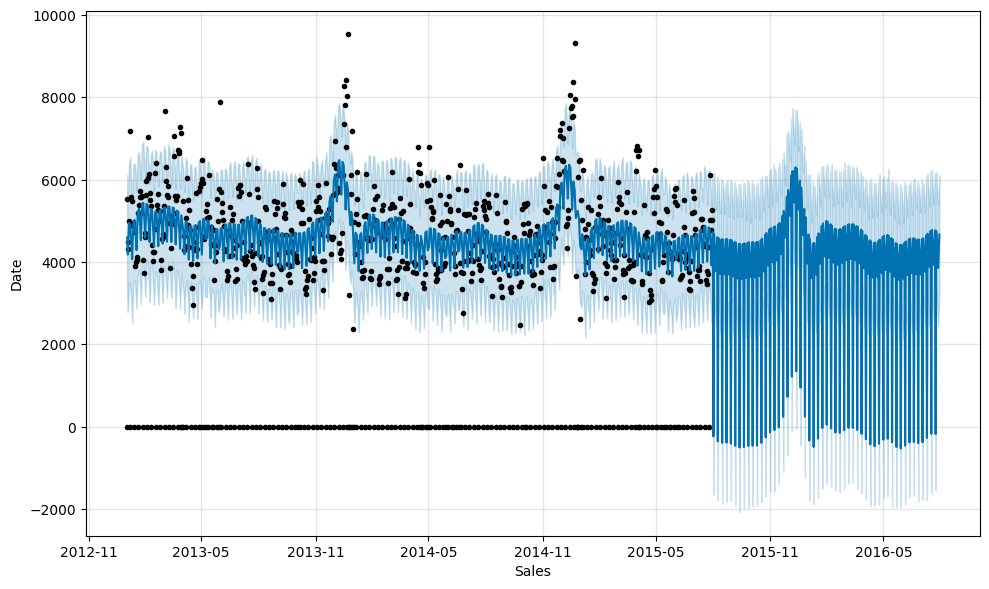

In [382]:
# Plotting the forecast
fig = m1.plot(forecast1)
plt.xlabel('Sales')
plt.ylabel('Date')
plt.show()

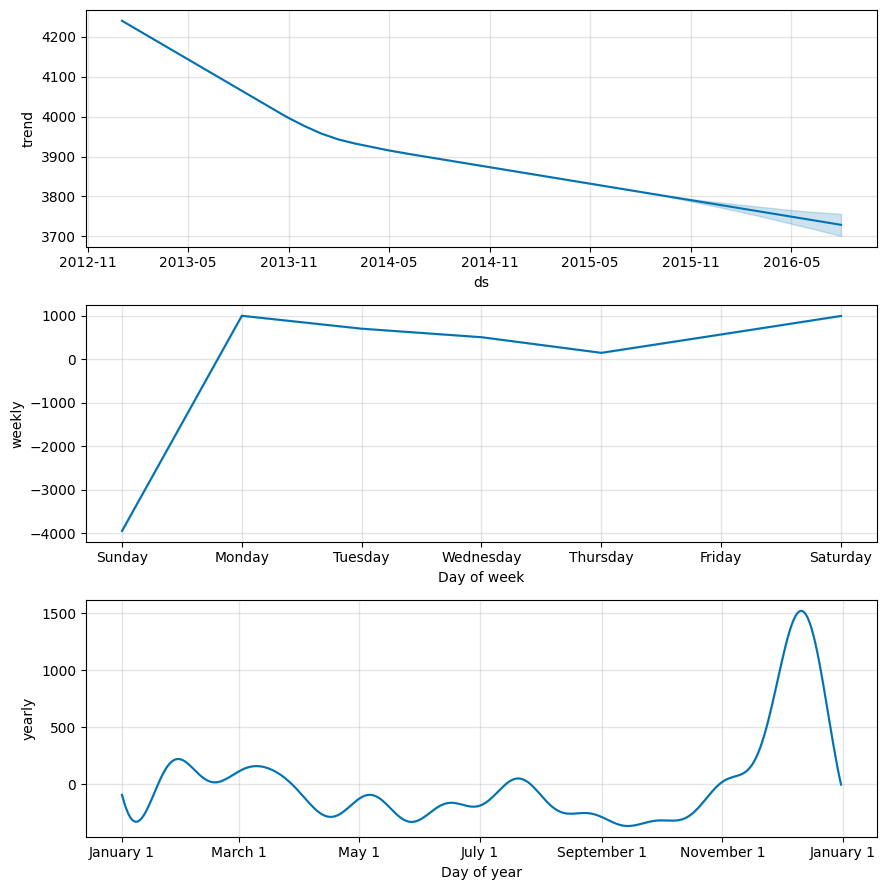

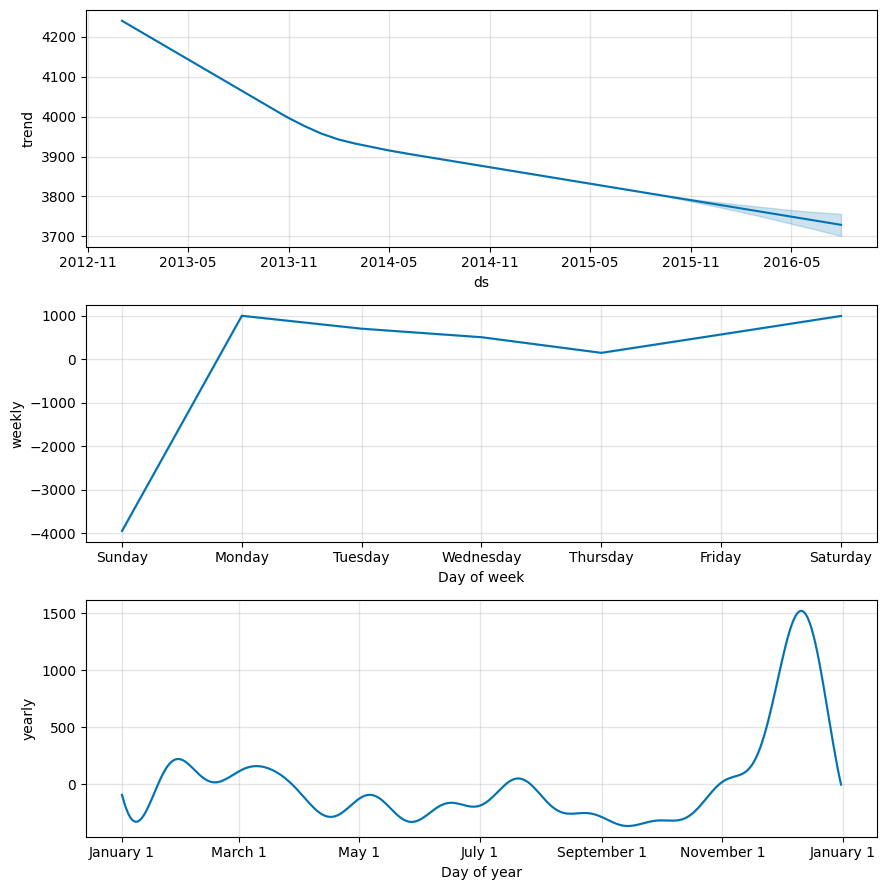

In [383]:
m1.plot_components(forecast1)

#Removing zero sales days.

In [ ]:
series2_fbp=series_fbp[series_fbp['y']>0]

In [ ]:
series2_fbp.head(3)

ds     y
Date                        
2015-07-31  2015-07-31  5263
2015-07-30  2015-07-30  5020
2015-07-29  2015-07-29  4782

In [ ]:
# fit the model
m2 = Prophet()
m2.fit(series2_fbp)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb1rcqtl9/2o1foclv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb1rcqtl9/e0pfj5e1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43984', 'data', 'file=/tmp/tmpb1rcqtl9/2o1foclv.json', 'init=/tmp/tmpb1rcqtl9/e0pfj5e1.json', 'output', 'file=/tmp/tmpb1rcqtl9/prophet_modeleu2ag2n2/prophet_model-20230511063628.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:36:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:36:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
#Creating future dates for prediction
future = m2.make_future_dataframe(periods=365)

In [384]:
# Making predictions
forecast2 = m2.predict(future)

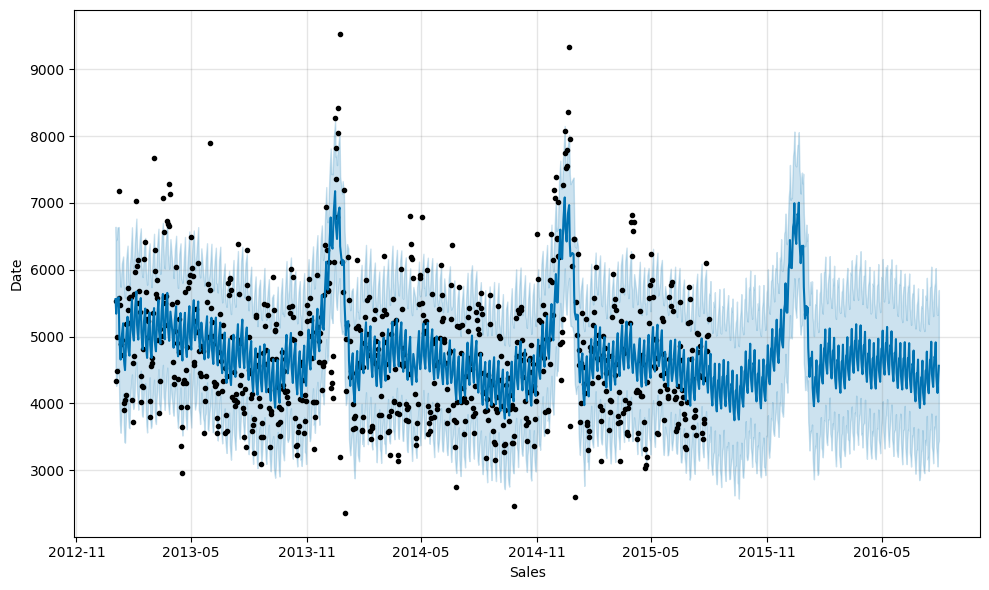

In [385]:
# Plotting the forecast
fig = m2.plot(forecast2)
plt.xlabel('Sales')
plt.ylabel('Date')
plt.show()

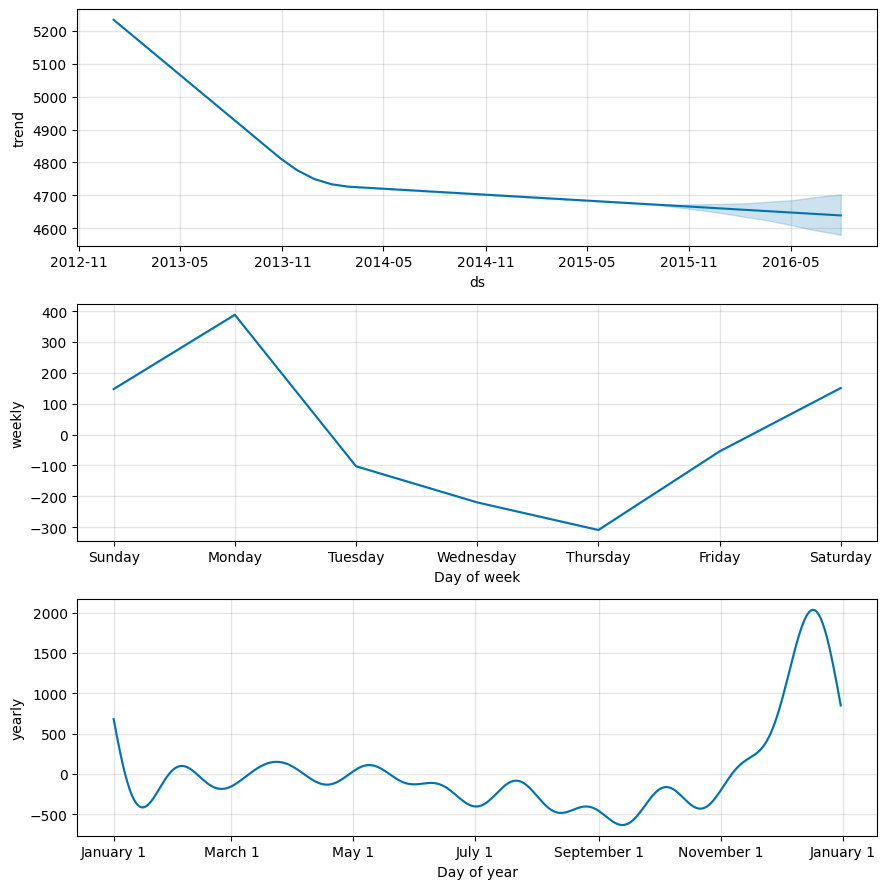

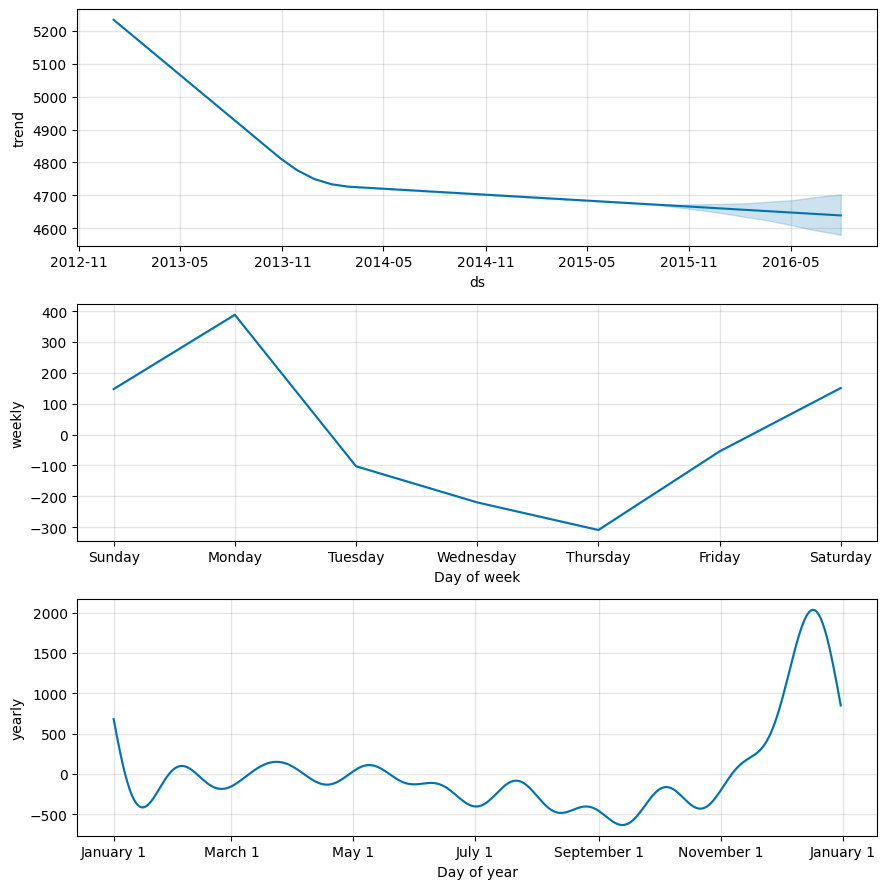

In [386]:
m2.plot_components(forecast2)

#<b>Adding Holidays

In [398]:
# fit the model
m3 = Prophet()

In [399]:
m3.add_country_holidays(country_name='US')

In [401]:
m3.fit(series2_fbp)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb1rcqtl9/9t6utz4i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb1rcqtl9/9cx4u25g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46167', 'data', 'file=/tmp/tmpb1rcqtl9/9t6utz4i.json', 'init=/tmp/tmpb1rcqtl9/9cx4u25g.json', 'output', 'file=/tmp/tmpb1rcqtl9/prophet_modeln6pi5_vf/prophet_model-20230511073740.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:37:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:37:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [402]:
#Creating future dates for prediction
future3 = m3.make_future_dataframe(periods=365)

In [403]:
# Making predictions
forecast3 = m3.predict(future3)

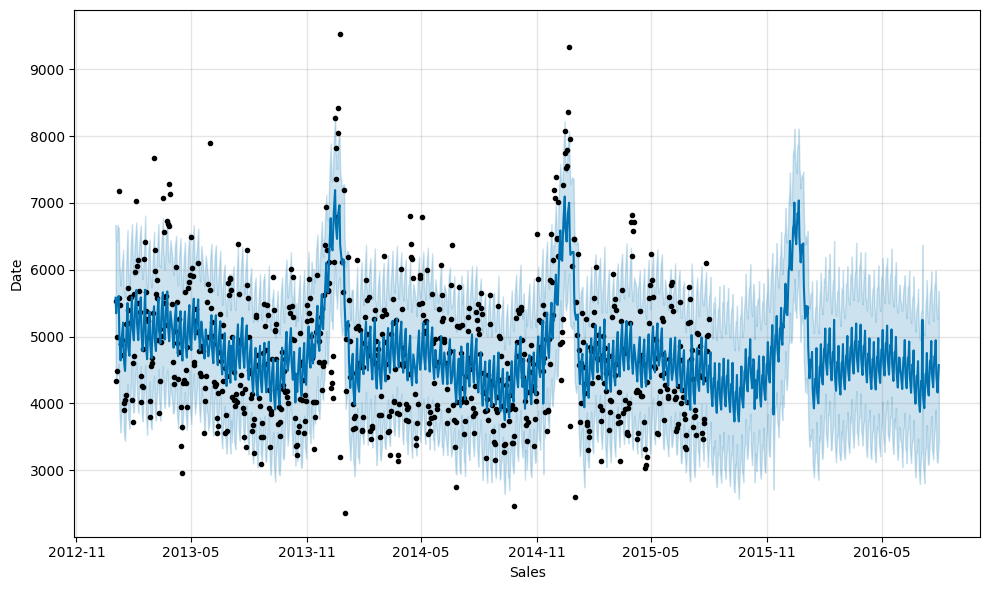

In [404]:
# Plotting the forecast
fig = m3.plot(forecast3)
plt.xlabel('Sales')
plt.ylabel('Date')
plt.show()

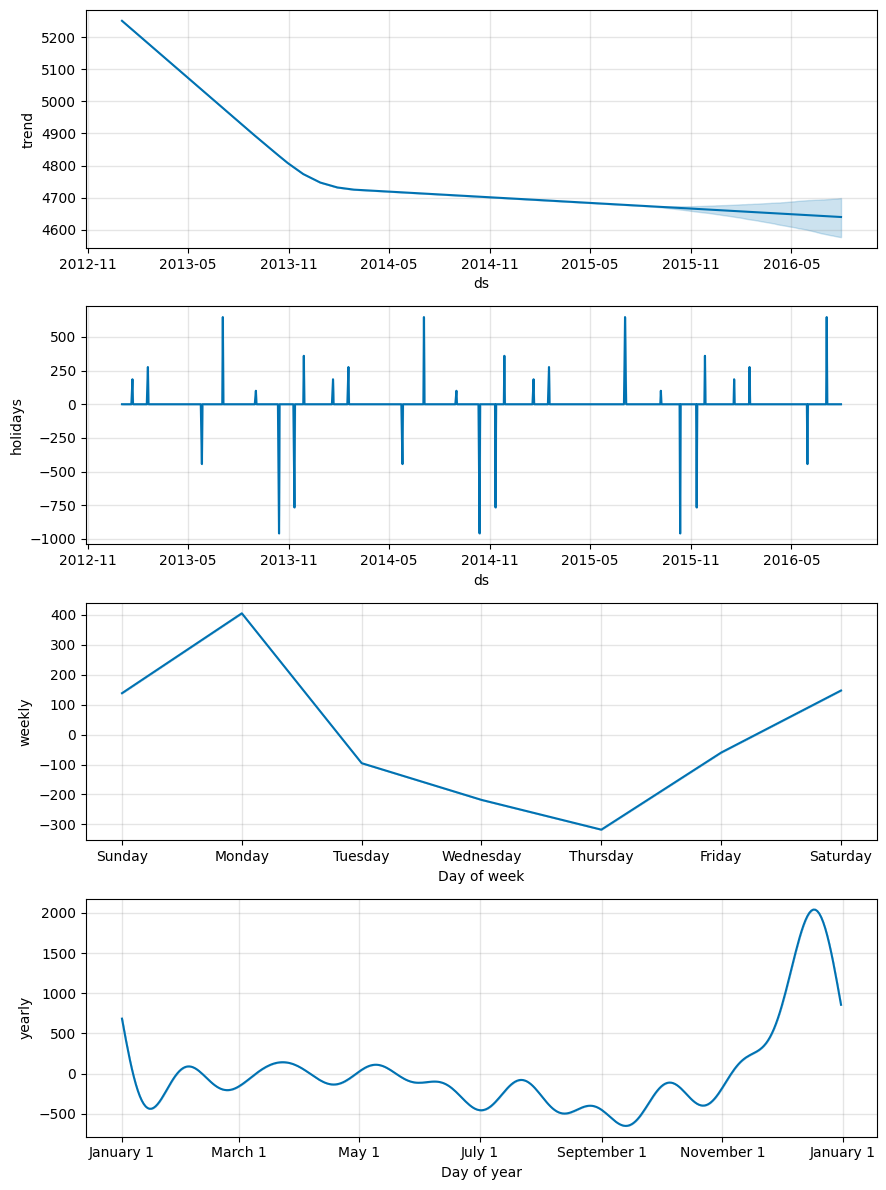

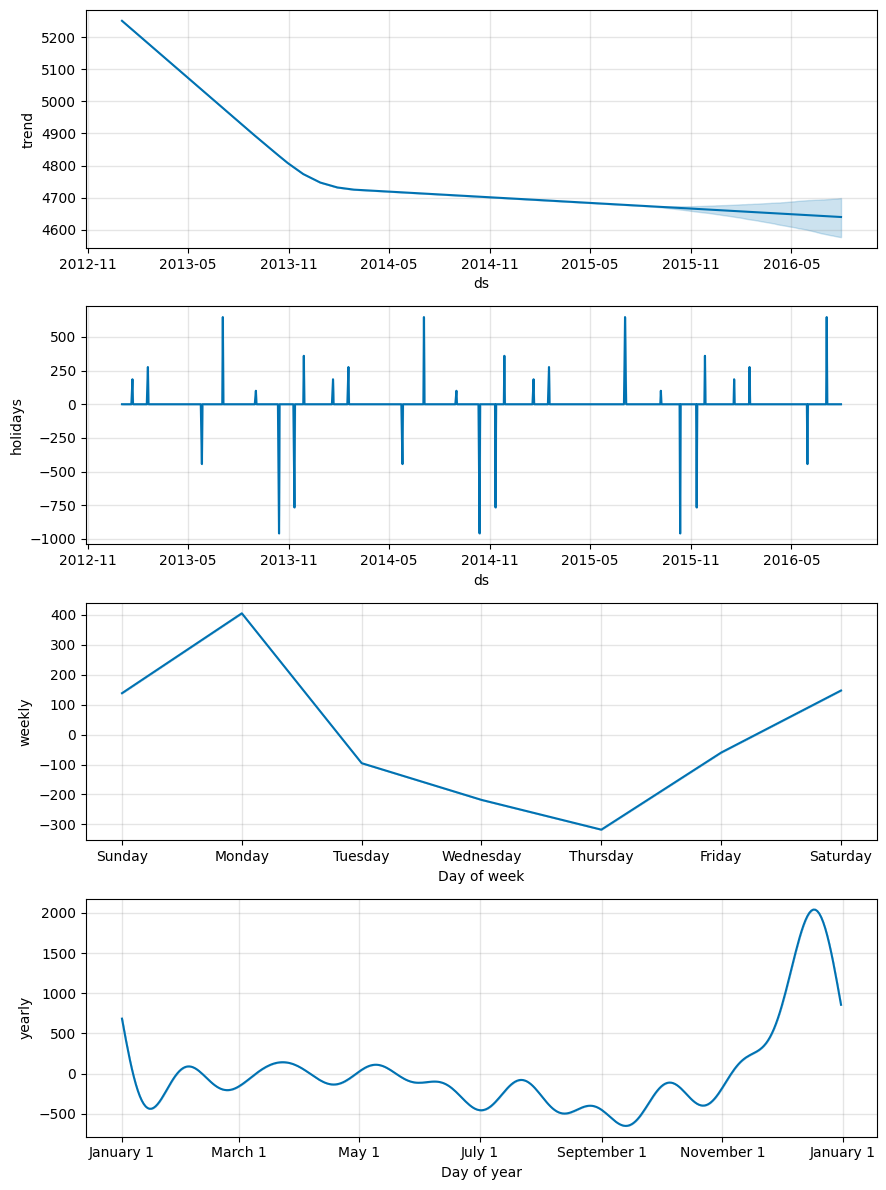

In [405]:
m3.plot_components(forecast3)

#<b>Adding Regressors

In [406]:
set(merged_dataset['StateHoliday'])

{0, '0', 'a', 'b', 'c'}

In [407]:
set(merged_dataset['SchoolHoliday'])

{0, 1}

In [408]:
series_fbp

ds     y  open  promo  SH1  SH2  SH3  SH4  SchoolHoliday
Date                                                                        
2015-07-31  2015-07-31  5263     1      1    1    0    0    0              1
2015-07-30  2015-07-30  5020     1      1    1    0    0    0              1
2015-07-29  2015-07-29  4782     1      1    1    0    0    0              1
2015-07-28  2015-07-28  5011     1      1    1    0    0    0              1
2015-07-27  2015-07-27  6102     1      1    1    0    0    0              1
...                ...   ...   ...    ...  ...  ...  ...  ...            ...
2013-01-05  2013-01-05  4997     1      0    1    0    0    0              1
2013-01-04  2013-01-04  4486     1      0    1    0    0    0              1
2013-01-03  2013-01-03  4327     1      0    1    0    0    0              1
2013-01-02  2013-01-02  5530     1      0    1    0    0    0              1
2013-01-01  2013-01-01     0     0      0    0    1    0    0              1

[942 rows x 9 columns]

In [409]:
df

Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
Date                                                                       
2015-07-31      1          5   5263        555     1      1            0   
2015-07-30      1          4   5020        546     1      1            0   
2015-07-29      1          3   4782        523     1      1            0   
2015-07-28      1          2   5011        560     1      1            0   
2015-07-27      1          1   6102        612     1      1            0   
...           ...        ...    ...        ...   ...    ...          ...   
2013-01-05   1115          6   4771        339     1      0            0   
2013-01-04   1115          5   4540        326     1      0            0   
2013-01-03   1115          4   4297        300     1      0            0   
2013-01-02   1115          3   3697        305     1      0            0   
2013-01-01   1115          2      0          0     0      0            a   

            SchoolHoliday StoreType Assortment  CompetitionDistance  \
Date                                                                  
2015-07-31              1         c          a               1270.0   
2015-07-30              1         c          a               1270.0   
2015-07-29              1         c          a               1270.0   
2015-07-28              1         c          a               1270.0   
2015-07-27              1         c          a               1270.0   
...                   ...       ...        ...                  ...   
2013-01-05              1         d          c               5350.0   
2013-01-04              1         d          c               5350.0   
2013-01-03              1         d          c               5350.0   
2013-01-02              1         d          c               5350.0   
2013-01-01              1         d          c               5350.0   

            CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
Date                                                                      
2015-07-31                        9.0                    2008.0       0   
2015-07-30                        9.0                    2008.0       0   
2015-07-29                        9.0                    2008.0       0   
2015-07-28                        9.0                    2008.0       0   
2015-07-27                        9.0                    2008.0       0   
...                               ...                       ...     ...   
2013-01-05                        8.0                    2010.0       1   
2013-01-04                        8.0                    2010.0       1   
2013-01-03                        8.0                    2010.0       1   
2013-01-02                        8.0                    2010.0       1   
2013-01-01                        8.0                    2010.0       1   

            Promo2SinceWeek  Promo2SinceYear     PromoInterval  
Date                                                            
2015-07-31              0.0              0.0                 0  
2015-07-30              0.0              0.0                 0  
2015-07-29              0.0              0.0                 0  
2015-07-28              0.0              0.0                 0  
2015-07-27              0.0              0.0                 0  
...                     ...              ...               ...  
2013-01-05             22.0           2012.0  Mar,Jun,Sept,Dec  
2013-01-04             22.0           2012.0  Mar,Jun,Sept,Dec  
2013-01-03             22.0           2012.0  Mar,Jun,Sept,Dec  
2013-01-02             22.0           2012.0  Mar,Jun,Sept,Dec  
2013-01-01             22.0           2012.0  Mar,Jun,Sept,Dec  

[1017209 rows x 17 columns]

In [410]:
series_fbp['open']=df[df['Store']==1]['Open']

series_fbp['promo']=df[df['Store']==1]['Promo']

In [411]:
df[df['Store']==1]['StateHoliday'].nunique()

5

In [412]:
series_fbp[['SH1','SH2','SH3','SH4']]=pd.get_dummies(df[df['Store']==1]['StateHoliday'],drop_first=True)

In [413]:
series_fbp['SchoolHoliday']=df[df['Store']==1]['SchoolHoliday']

In [414]:
series_fbp.head(3)

ds     y  open  promo  SH1  SH2  SH3  SH4  SchoolHoliday
Date                                                                        
2015-07-31  2015-07-31  5263     1      1    1    0    0    0              1
2015-07-30  2015-07-30  5020     1      1    1    0    0    0              1
2015-07-29  2015-07-29  4782     1      1    1    0    0    0              1

In [415]:
m4=Prophet()
m4.add_regressor('open',mode='multiplicative')
m4.add_regressor('promo',mode='additive')
m4.add_regressor('SH1',mode='additive')
m4.add_regressor('SH2',mode='additive')
m4.add_regressor('SchoolHoliday',mode='additive')
m4.fit(series_fbp)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb1rcqtl9/h83o549c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb1rcqtl9/0m31ul5p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69532', 'data', 'file=/tmp/tmpb1rcqtl9/h83o549c.json', 'init=/tmp/tmpb1rcqtl9/0m31ul5p.json', 'output', 'file=/tmp/tmpb1rcqtl9/prophet_model_w4hiukf/prophet_model-20230511073842.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:38:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:38:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
#Creating future dates for prediction
future4 = m4.make_future_dataframe(periods=365)

In [ ]:
train_idx=future4['ds'].isin(series_fbp.index)
test_idx=~train_idx

In [ ]:
#creating regressors for training set
regressors=['ds', 'y', 'open', 'promo', 'SH1', 'SH2', 'SH3', 'SH4','SchoolHoliday']
for r in regressors:
  future4.loc[train_idx,r]=series_fbp[r].to_list()

In [ ]:
#creating regressors for training set
future4.loc[test_idx,'open']= \
 future4.loc[test_idx,'ds'].apply(lambda x:1.0*(x.weekday()!=6))


 

In [ ]:
for r in regressors[1:]:
  future4.loc[test_idx,r]= \
   series_fbp.iloc[-365:][r].to_list()

In [ ]:
future4.tail(5)

ds       y  open  promo  SH1  SH2  SH3  SH4  SchoolHoliday
1302 2016-07-26  4997.0   1.0    0.0  1.0  0.0  0.0  0.0            1.0
1303 2016-07-27  4486.0   1.0    0.0  1.0  0.0  0.0  0.0            1.0
1304 2016-07-28  4327.0   1.0    0.0  1.0  0.0  0.0  0.0            1.0
1305 2016-07-29  5530.0   1.0    0.0  1.0  0.0  0.0  0.0            1.0
1306 2016-07-30     0.0   0.0    0.0  0.0  1.0  0.0  0.0            1.0

In [ ]:
# Making predictions
forecast4 = m4.predict(future4)

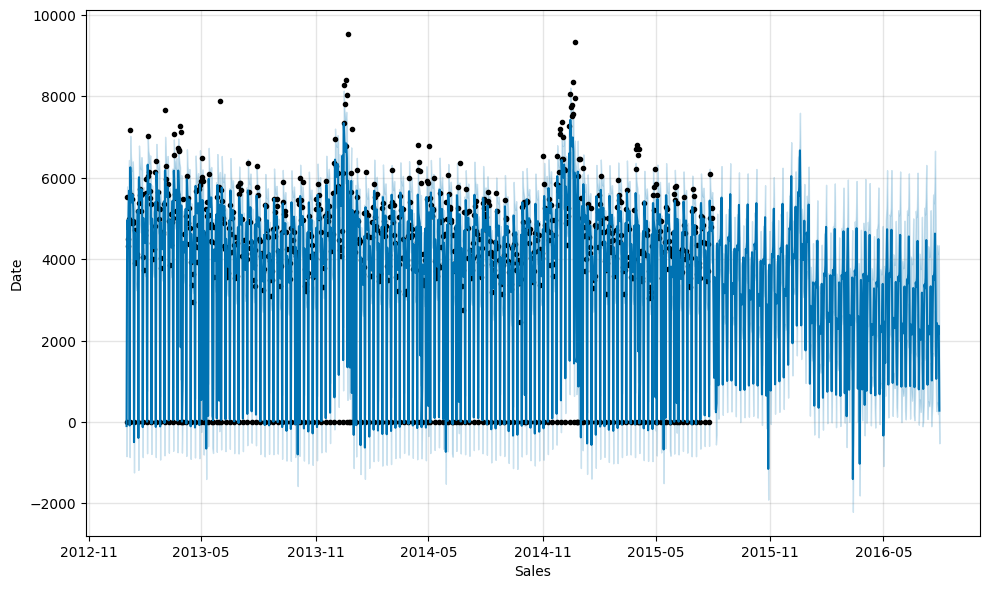

In [ ]:
# Plotting the forecast
fig = m4.plot(forecast4)
plt.xlabel('Sales')
plt.ylabel('Date')
plt.show()

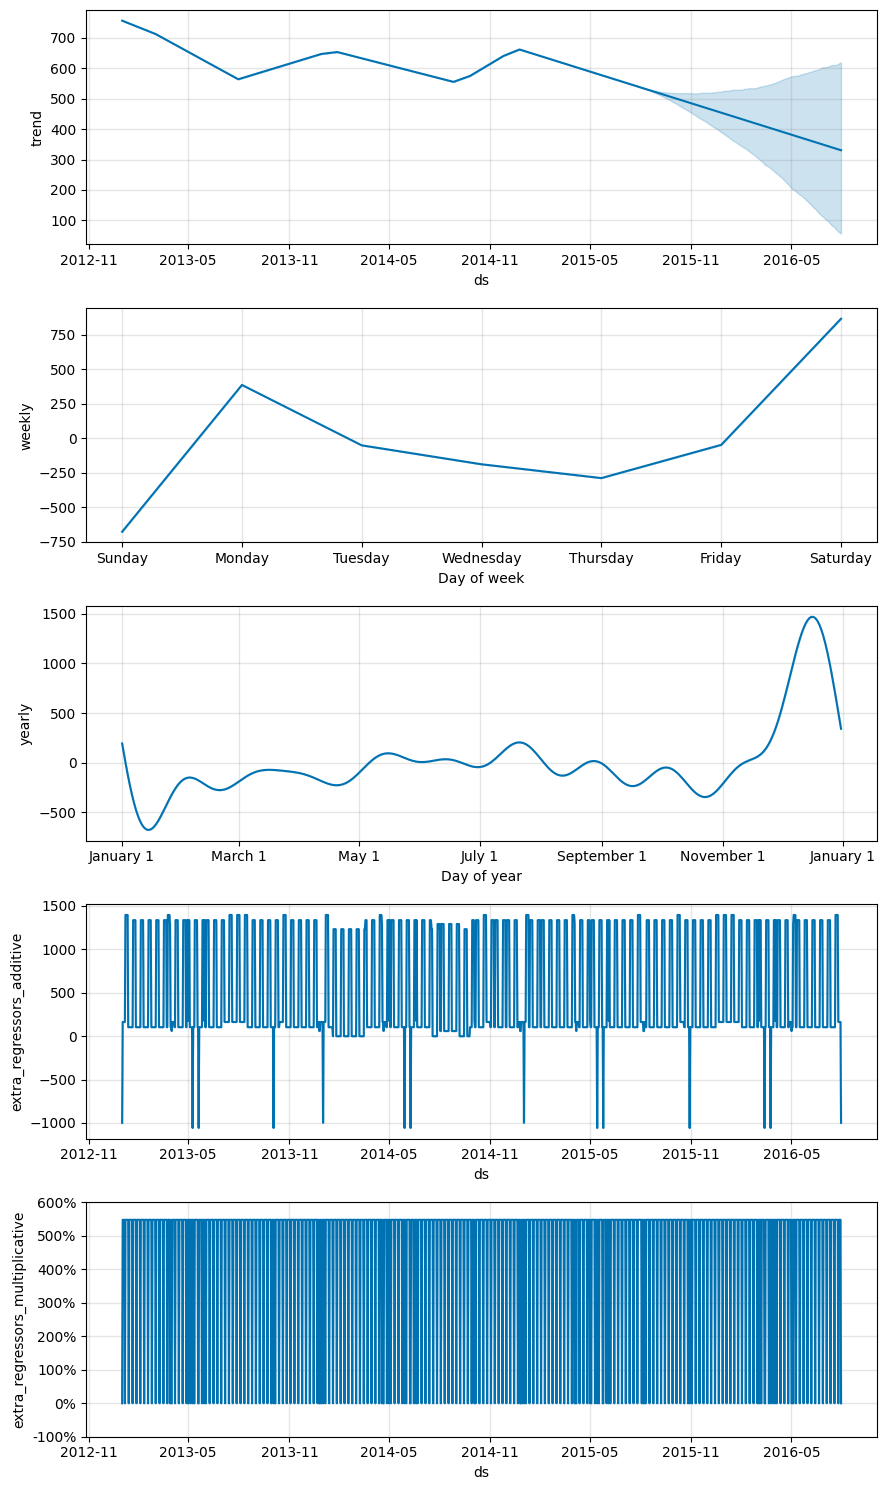

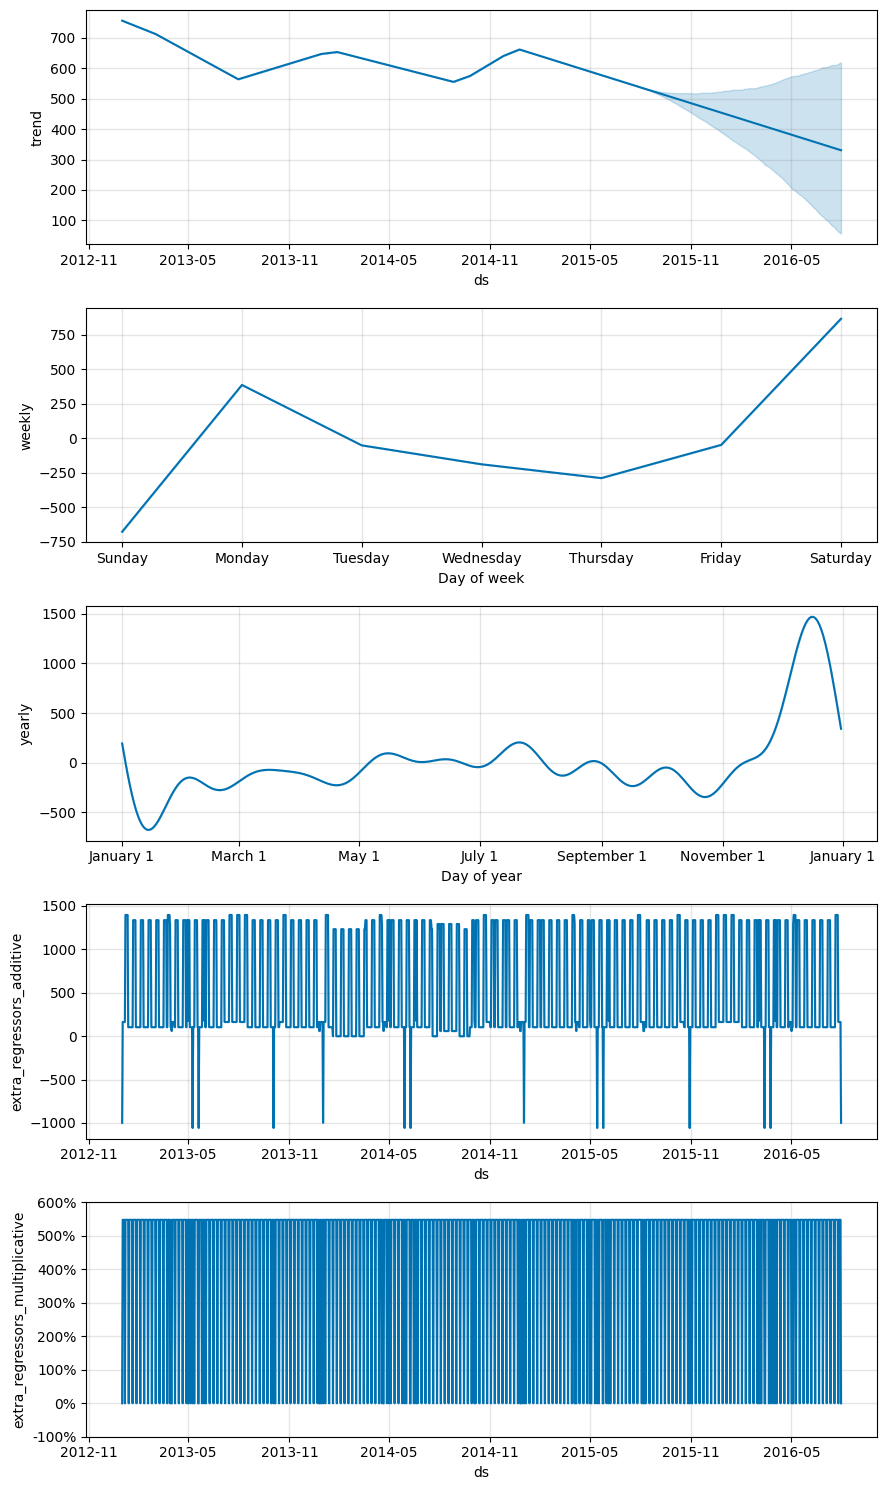

In [ ]:
m4.plot_components(forecast4)

#<b>Cross Validation

In [ ]:
from prophet.diagnostics import cross_validation

In [ ]:
# initial='no of training points',period='Step size,horizon='No. of steps to forecast'
df_cv=cross_validation(m1,initial='730 days',period='30 days',horizon='60 days')

INFO:prophet:Making 6 forecasts with cutoffs between 2015-01-02 00:00:00 and 2015-06-01 00:00:00


  0%|          | 0/6 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpb1rcqtl9/_1sqxrj5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb1rcqtl9/hkguj1bj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26359', 'data', 'file=/tmp/tmpb1rcqtl9/_1sqxrj5.json', 'init=/tmp/tmpb1rcqtl9/hkguj1bj.json', 'output', 'file=/tmp/tmpb1rcqtl9/prophet_modelnh97nv1s/prophet_model-20230511071003.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:10:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:10:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb1rcqtl9/wyolw32s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb1rcqtl9/qg2vzf8o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [ ]:
df_cv

ds         yhat   yhat_lower   yhat_upper     y     cutoff
0   2015-01-03  4608.289681  3219.080263  6108.889935  5023 2015-01-02
1   2015-01-04  -445.550548 -2060.108795  1051.542891     0 2015-01-02
2   2015-01-05  4571.201302  3123.538049  5988.425803  6239 2015-01-02
3   2015-01-06  4186.760885  2784.697230  5631.271087  4574 2015-01-02
4   2015-01-07  3949.021942  2554.298420  5403.196065  4796 2015-01-02
..         ...          ...          ...          ...   ...        ...
355 2015-07-27  4773.335144  3327.482321  6154.009775  6102 2015-06-01
356 2015-07-28  4448.661219  3066.981187  5939.736428  5011 2015-06-01
357 2015-07-29  4234.084441  2929.381869  5721.557861  4782 2015-06-01
358 2015-07-30  3858.515391  2410.200813  5259.894741  5020 2015-06-01
359 2015-07-31  4250.625231  2852.869283  5695.898875  5263 2015-06-01

[360 rows x 6 columns]

In [ ]:
from prophet.diagnostics import performance_metrics

In [ ]:
pm1=performance_metrics(df_cv)

INFO:prophet:Skipping MAPE because y close to 0


In [ ]:
pm1

horizon           mse         rmse          mae     mdape     smape  \
0   6 days  2.222793e+06  1490.903436   920.421266  0.137957  0.550481   
1   7 days  1.587479e+06  1259.951824   759.027734  0.132260  0.491753   
2   8 days  1.460648e+06  1208.572593   705.468425  0.124084  0.486157   
3   9 days  1.167144e+06  1080.344591   690.078243  0.144806  0.453722   
4  10 days  5.060986e+05   711.406086   578.755228  0.153836  0.460164   
5  11 days  4.973497e+05   705.230258   569.664156  0.146121  0.403334   
6  12 days  8.566679e+05   925.563584   633.093741  0.146121  0.450098   
7  13 days  8.260868e+05   908.893157   604.759927  0.135763  0.441473   
8  14 days  7.819839e+05   884.298555   566.394472  0.123911  0.432889   
9  15 days  6.555906e+05   809.685502   498.259309  0.102864  0.414538   
10 16 days  5.841427e+05   764.292264   432.821950  0.094606  0.398758   
11 17 days  6.555649e+05   809.669654   488.668614  0.102864  0.464670   
12 18 days  3.227797e+05   568.137017   455.368764  0.110738  0.372160   
13 19 days  3.960642e+05   629.336311   499.826097  0.135885  0.386496   
14 20 days  4.793114e+05   692.323222   569.471017  0.173230  0.402434   
15 21 days  5.318075e+05   729.251340   593.107746  0.186091  0.412462   
16 22 days  6.464907e+05   804.046469   681.027729  0.223431  0.433203   
17 23 days  1.145049e+06  1070.069674   743.139194  0.224460  0.476760   
18 24 days  1.075919e+06  1037.265164   695.728910  0.207652  0.518874   
19 25 days  1.029677e+06  1014.730203   673.939173  0.180936  0.456312   
20 26 days  9.594810e+05   979.531021   621.419714  0.163911  0.444760   
21 27 days  1.047863e+06  1023.651756   658.489284  0.158916  0.444208   
22 28 days  1.204844e+06  1097.653648   708.996241  0.158916  0.450053   
23 29 days  1.378556e+06  1174.119267   795.012326  0.158916  0.462113   
24 30 days  1.660455e+06  1288.586599   924.500591  0.180244  0.486396   
25 31 days  2.357629e+06  1535.457319  1127.314829  0.220643  0.610485   
26 32 days  2.534182e+06  1591.911476  1207.002254  0.226910  0.568586   
27 33 days  2.730848e+06  1652.527645  1190.424231  0.220643  0.602128   
28 34 days  3.157905e+06  1777.049479  1226.530717  0.220643  0.638583   
29 35 days  2.400807e+06  1549.453874  1010.164743  0.157370  0.568868   
30 36 days  2.174719e+06  1474.692972   908.242166  0.135877  0.550336   
31 37 days  1.480584e+06  1216.792588   711.854325  0.118724  0.483607   
32 38 days  1.325914e+06  1151.483355   645.552682  0.118724  0.528219   
33 39 days  1.110805e+06  1053.947123   665.368860  0.127143  0.450412   
34 40 days  5.123473e+05   715.784384   571.900799  0.132599  0.407048   
35 41 days  5.163389e+05   718.567227   571.699378  0.133212  0.406764   
36 42 days  8.707127e+05   933.119892   624.569309  0.127756  0.450686   
37 43 days  8.435004e+05   918.422772   600.777681  0.125005  0.441915   
38 44 days  8.153983e+05   902.994067   581.315939  0.123059  0.437198   
39 45 days  6.906239e+05   831.037835   514.659722  0.104447  0.472355   
40 46 days  5.909711e+05   768.746422   438.382849  0.092998  0.399149   
41 47 days  6.321435e+05   795.074514   482.253964  0.094719  0.407693   
42 48 days  2.694912e+05   519.125438   427.676792  0.099718  0.365510   
43 49 days  3.111393e+05   557.798585   452.042855  0.106099  0.374769   
44 50 days  4.055681e+05   636.842265   516.166732  0.115405  0.389398   
45 51 days  4.553124e+05   674.768412   540.712344  0.147704  0.399067   
46 52 days  5.715937e+05   756.038176   623.679098  0.219097  0.474168   
47 53 days  1.152013e+06  1073.318498   731.870708  0.228595  0.473489   
48 54 days  1.105557e+06  1051.454736   707.953632  0.196872  0.467180   
49 55 days  1.084082e+06  1041.192634   696.466012  0.196872  0.462950   
50 56 days  1.036742e+06  1018.205420   661.004526  0.166362  0.454013   
51 57 days  1.101312e+06  1049.434017   684.402395  0.155684  0.450162   
52 58 days  1.230787e+06  1109.408212   723.092731  0.155684  0.453278   
53 59 d

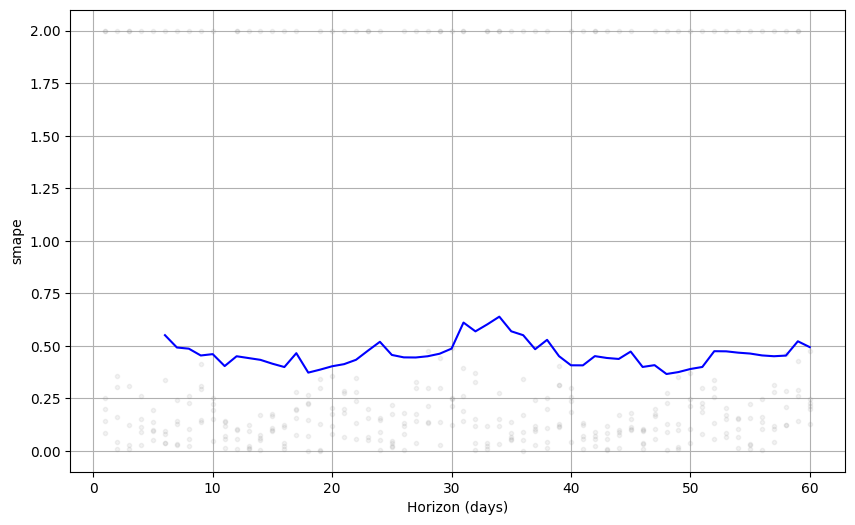

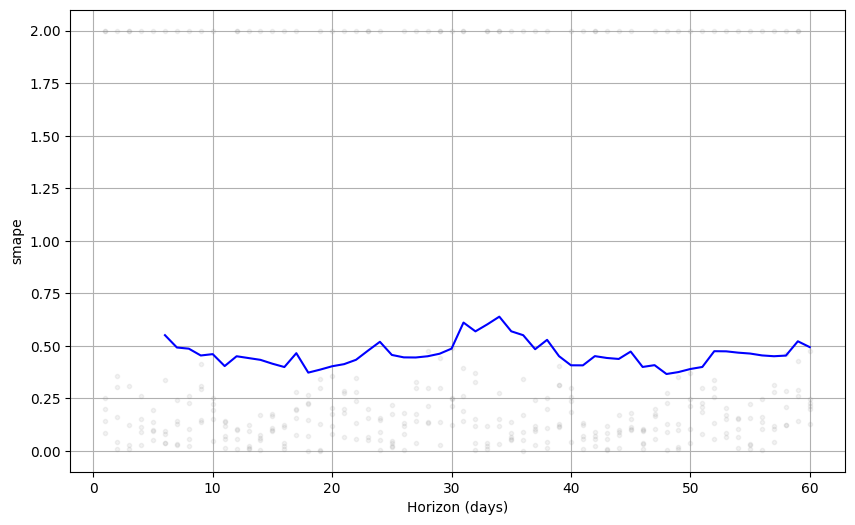

In [ ]:
from prophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(df_cv,metric='smape')

In [ ]:
# initial='no of training points',period='Step size,horizon='No. of steps to forecast'
df_cv2=cross_validation(m2,initial='730 days',period='30 days',horizon='60 days')

INFO:prophet:Making 6 forecasts with cutoffs between 2015-01-02 00:00:00 and 2015-06-01 00:00:00


  0%|          | 0/6 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpb1rcqtl9/f0008pm_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb1rcqtl9/wi1jsw3a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17081', 'data', 'file=/tmp/tmpb1rcqtl9/f0008pm_.json', 'init=/tmp/tmpb1rcqtl9/wi1jsw3a.json', 'output', 'file=/tmp/tmpb1rcqtl9/prophet_model1l9vob4a/prophet_model-20230511071006.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:10:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:10:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb1rcqtl9/czgz8ujm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb1rcqtl9/073r7j6c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [ ]:
df_cv2

ds         yhat   yhat_lower   yhat_upper     y     cutoff
0   2015-01-03  5517.333961  4394.244700  6654.351435  5023 2015-01-02
1   2015-01-05  5527.591217  4395.251710  6625.396674  6239 2015-01-02
2   2015-01-06  4901.396472  3844.765861  5992.403302  4574 2015-01-02
3   2015-01-07  4676.272953  3545.465446  5668.962705  4796 2015-01-02
4   2015-01-08  4494.710492  3435.088557  5591.958177  3716 2015-01-02
..         ...          ...          ...          ...   ...        ...
292 2015-07-27  4955.342972  3795.632335  5987.464915  6102 2015-06-01
293 2015-07-28  4419.737292  3344.216753  5503.999669  5011 2015-06-01
294 2015-07-29  4281.901665  3203.247066  5357.073397  4782 2015-06-01
295 2015-07-30  4152.448378  3030.968854  5264.388271  5020 2015-06-01
296 2015-07-31  4389.457698  3261.405600  5537.985157  5263 2015-06-01

[297 rows x 6 columns]

In [ ]:
pm2=performance_metrics(df_cv2)

In [ ]:
pm2

horizon           mse         rmse         mae      mape     mdape  \
0   7 days  5.295379e+05   727.693562  566.459970  0.124891  0.098104   
1   8 days  5.043495e+05   710.175705  580.669787  0.140002  0.108655   
2   9 days  8.136976e+05   902.051890  741.098157  0.195084  0.148849   
3  10 days  9.505488e+05   974.960929  833.118329  0.223597  0.201299   
4  11 days  9.545237e+05   976.997301  851.168265  0.228016  0.201299   
5  12 days  8.664170e+05   930.815248  786.325372  0.210348  0.188591   
6  13 days  7.579174e+05   870.584501  700.641758  0.186528  0.155806   
7  14 days  5.965570e+05   772.370996  608.479540  0.158638  0.104371   
8  15 days  3.643745e+05   603.634418  489.033995  0.117895  0.085310   
9  16 days  2.215490e+05   470.689867  372.523883  0.085997  0.067477   
10 17 days  2.657603e+05   515.519439  406.337408  0.093729  0.075810   
11 18 days  3.940738e+05   627.753004  488.862455  0.116958  0.085310   
12 19 days  5.231047e+05   723.259776  570.614204  0.145288  0.093572   
13 20 days  6.740478e+05   821.004133  646.941844  0.170986  0.116010   
14 21 days  8.357728e+05   914.206109  759.741965  0.206819  0.164910   
15 22 days  1.009665e+06  1004.820959  860.965820  0.239351  0.246428   
16 23 days  9.846670e+05   992.303902  857.357326  0.240015  0.243803   
17 24 days  9.197862e+05   959.054867  837.467238  0.233949  0.183935   
18 25 days  7.733110e+05   879.381027  741.979467  0.203192  0.153207   
19 26 days  5.949777e+05   771.347982  634.908041  0.170170  0.136811   
20 27 days  5.146293e+05   717.376678  580.431470  0.140196  0.101950   
21 28 days  5.440599e+05   737.604174  599.117186  0.125135  0.101839   
22 29 days  7.570198e+05   870.068860  671.152781  0.127876  0.099667   
23 30 days  9.655493e+05   982.623686  779.019333  0.139040  0.101950   
24 31 days  1.103167e+06  1050.317350  873.019746  0.152087  0.139200   
25 32 days  1.266390e+06  1125.339871  954.990847  0.162054  0.148905   
26 33 days  1.175586e+06  1084.244302  898.981444  0.153975  0.139200   
27 34 days  1.057063e+06  1028.135895  838.481021  0.146226  0.127682   
28 35 days  7.841915e+05   885.545859  697.960181  0.126855  0.103781   
29 36 days  6.259513e+05   791.170812  613.466279  0.122432  0.097959   
30 37 days  5.077103e+05   712.537909  546.991068  0.120648  0.097527   
31 38 days  4.924897e+05   701.776095  557.113832  0.134126  0.100362   
32 39 days  7.874730e+05   887.396728  716.896007  0.189860  0.137432   
33 40 days  9.550117e+05   977.246995  828.739800  0.225307  0.194721   
34 41 days  9.601756e+05   979.885527  844.188810  0.229641  0.228943   
35 42 days  8.802041e+05   938.191906  789.677238  0.214359  0.194721   
36 43 days  8.025886e+05   895.873068  737.290146  0.197720  0.153415   
37 44 days  6.557094e+05   809.758838  659.046742  0.172842  0.136231   
38 45 days  4.385274e+05   662.213998  541.875454  0.133636  0.097556   
39 46 days  2.295681e+05   479.132701  381.768323  0.087634  0.066241   
40 47 days  2.383078e+05   488.167835  395.971517  0.089140  0.072953   
41 48 days  3.601140e+05   600.095004  462.110309  0.108022  0.083913   
42 49 days  4.651101e+05   681.989839  523.721654  0.129806  0.084859   
43 50 days  6.469684e+05   804.343470  615.636294  0.159423  0.103055   
44 51 days  8.227982e+05   907.082246  736.822654  0.197345  0.134958   
45 52 days  1.068853e+06  1033.853438  886.591317  0.243316  0.175623   
46 53 days  1.095779e+06  1046.794785  921.543429  0.255347  0.234605   
47 54 days  1.027148e+06  1013.483306  905.694768  0.250402  0.215540   
48 55 days  9.213317e+05   959.860248  841.046166  0.231109  0.215540   
49 56 days  7.524256e+05   867.424713  749.360647  0.198729  0.167479   
50 57 days  6.297817e+05   793.587864  672.615389  0.163651  0.157884   
51 58 days  5.816414e+05   762.654201  648.797924  0.138883  0.134601   
52 59 days  7.644594e+05   874.333680  716.493971  0.139660  0.117993   
53 60 days  9.333609e+05   966.106034  806.281754  0.145256  

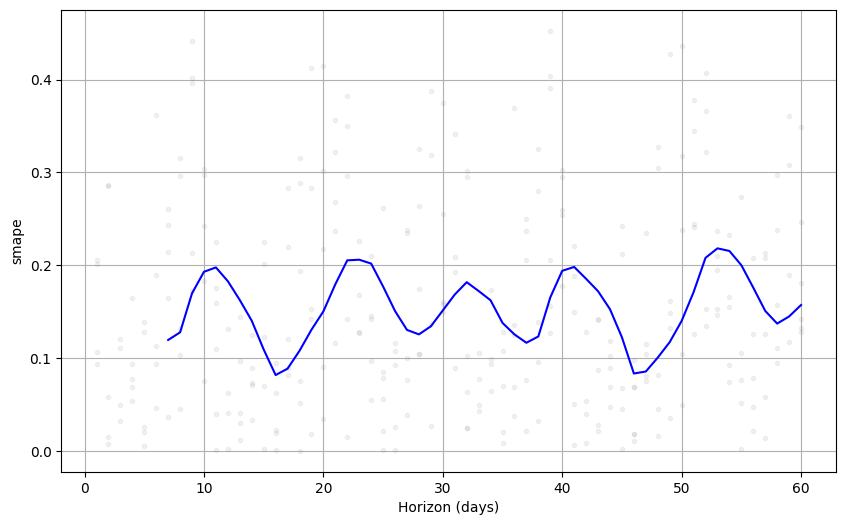

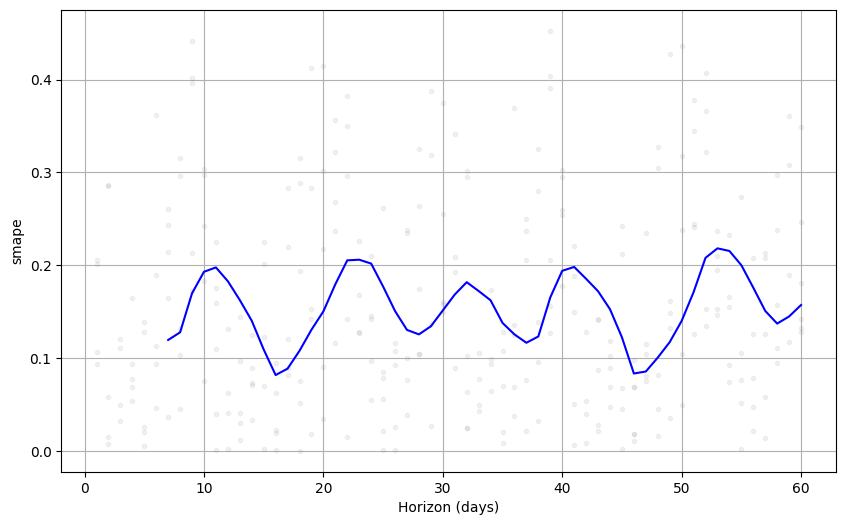

In [ ]:
from prophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(df_cv2,metric='smape')

In [ ]:
# initial='no of training points',period='Step size,horizon='No. of steps to forecast'
df_cv3=cross_validation(m3,initial='730 days',period='30 days',horizon='60 days')

INFO:prophet:Making 6 forecasts with cutoffs between 2015-01-02 00:00:00 and 2015-06-01 00:00:00


  0%|          | 0/6 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpb1rcqtl9/917vlk3h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb1rcqtl9/bpbn2cz1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47122', 'data', 'file=/tmp/tmpb1rcqtl9/917vlk3h.json', 'init=/tmp/tmpb1rcqtl9/bpbn2cz1.json', 'output', 'file=/tmp/tmpb1rcqtl9/prophet_modelbnwtymq_/prophet_model-20230511071008.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:10:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:10:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb1rcqtl9/q9swqldm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb1rcqtl9/d54fbsxb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [ ]:
df_cv3

ds         yhat   yhat_lower   yhat_upper     y     cutoff
0   2015-01-03  5201.486481  3731.501927  6494.629502  5023 2015-01-02
1   2015-01-04   108.178050 -1202.007482  1496.154747     0 2015-01-02
2   2015-01-05  5075.756775  3678.354479  6453.948490  6239 2015-01-02
3   2015-01-06  4700.927396  3399.274637  6090.687836  4574 2015-01-02
4   2015-01-07  4458.785950  3115.028963  5754.550596  4796 2015-01-02
..         ...          ...          ...          ...   ...        ...
355 2015-07-27  4841.200745  3480.320945  6265.877839  6102 2015-06-01
356 2015-07-28  4519.540459  3154.697362  5973.835453  5011 2015-06-01
357 2015-07-29  4348.961352  2974.096577  5725.395285  4782 2015-06-01
358 2015-07-30  3961.472795  2525.971978  5236.033488  5020 2015-06-01
359 2015-07-31  4281.158627  2968.423543  5597.116498  5263 2015-06-01

[360 rows x 6 columns]

In [ ]:
pm3=performance_metrics(df_cv3)

INFO:prophet:Skipping MAPE because y close to 0


In [ ]:
pm3

horizon           mse         rmse          mae     mdape     smape  \
0   6 days  2.146207e+06  1464.993923   870.061155  0.129051  0.540681   
1   7 days  1.547307e+06  1243.907914   733.988046  0.123101  0.487509   
2   8 days  1.438295e+06  1199.289489   700.075641  0.123101  0.484007   
3   9 days  1.168097e+06  1080.785232   693.582152  0.140895  0.455481   
4  10 days  5.214995e+05   722.149206   595.544936  0.158290  0.464999   
5  11 days  5.250805e+05   724.624371   597.576170  0.147845  0.410902   
6  12 days  8.863651e+05   941.469623   648.770653  0.147845  0.454130   
7  13 days  8.412907e+05   917.218983   604.220029  0.123287  0.441779   
8  14 days  7.896790e+05   888.638862   556.248465  0.103076  0.431425   
9  15 days  7.050327e+05   839.662253   511.183402  0.098745  0.416054   
10 16 days  6.313258e+05   794.560147   447.273654  0.089296  0.399995   
11 17 days  7.582900e+05   870.798509   521.119302  0.096327  0.469308   
12 18 days  4.141364e+05   643.534320   489.055511  0.099767  0.377628   
13 19 days  4.922273e+05   701.589147   539.548301  0.123254  0.393559   
14 20 days  5.777442e+05   760.094839   610.978080  0.169130  0.409755   
15 21 days  5.779715e+05   760.244347   612.169502  0.172738  0.415623   
16 22 days  6.871379e+05   828.937822   693.080216  0.244138  0.435572   
17 23 days  1.138108e+06  1066.821420   737.926789  0.244138  0.476656   
18 24 days  1.068193e+06  1033.534353   688.714804  0.221412  0.518620   
19 25 days  1.017901e+06  1008.910694   657.358906  0.167468  0.453731   
20 26 days  9.443797e+05   971.792012   606.629089  0.156361  0.442216   
21 27 days  1.034658e+06  1017.181497   645.848578  0.149784  0.441961   
22 28 days  1.193266e+06  1092.367169   698.036761  0.149567  0.448499   
23 29 days  1.355239e+06  1164.147353   787.574175  0.152152  0.460537   
24 30 days  1.637950e+06  1279.824296   919.969479  0.178571  0.485323   
25 31 days  2.315639e+06  1521.722422  1124.780660  0.215074  0.610109   
26 32 days  2.496209e+06  1579.939619  1204.833646  0.223526  0.568648   
27 33 days  2.713439e+06  1647.252090  1201.094677  0.215074  0.604315   
28 34 days  3.136218e+06  1770.937171  1235.186546  0.215074  0.639748   
29 35 days  2.384939e+06  1544.324744  1014.191902  0.157295  0.569171   
30 36 days  2.164602e+06  1471.258670   918.024542  0.131369  0.551651   
31 37 days  1.495953e+06  1223.091392   730.166681  0.119552  0.486323   
32 38 days  1.346345e+06  1160.321105   666.660169  0.121616  0.531389   
33 39 days  1.126134e+06  1061.194605   675.678747  0.126440  0.452084   
34 40 days  5.429110e+05   736.824967   592.223043  0.143101  0.410958   
35 41 days  5.516420e+05   742.726063   600.421194  0.143101  0.412164   
36 42 days  9.170118e+05   957.607316   647.567418  0.129155  0.454516   
37 43 days  8.857556e+05   941.145901   619.438800  0.121740  0.445028   
38 44 days  8.508634e+05   922.422571   594.336065  0.114734  0.439316   
39 45 days  7.653541e+05   874.845164   546.545023  0.099101  0.477806   
40 46 days  6.580850e+05   811.224385   464.241411  0.089645  0.403279   
41 47 days  6.914616e+05   831.541702   500.422042  0.091015  0.410422   
42 48 days  3.132942e+05   559.726925   444.353284  0.095715  0.368160   
43 49 days  3.605068e+05   600.422156   473.140654  0.100069  0.378654   
44 50 days  4.603175e+05   678.467004   541.273015  0.106819  0.394156   
45 51 days  4.651430e+05   682.013915   549.063757  0.140215  0.400805   
46 52 days  5.829552e+05   763.515001   634.950823  0.233118  0.476790   
47 53 days  1.171987e+06  1082.583331   748.398208  0.254300  0.477235   
48 54 days  1.128980e+06  1062.534772   730.431159  0.196351  0.472576   
49 55 days  1.101571e+06  1049.557462   715.579328  0.196351  0.467523   
50 56 days  1.041789e+06  1020.680792   675.103761  0.164814  0.457204   
51 57 days  1.095421e+06  1046.623570   690.815638  0.155047  0.451652   
52 58 days  1.216262e+06  1102.842813   722.018936  0.150857  0.453080   
53 59 d

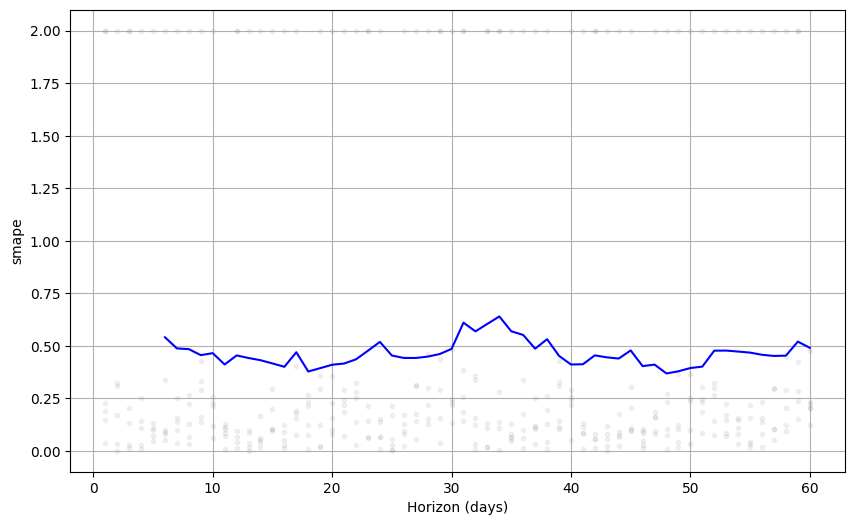

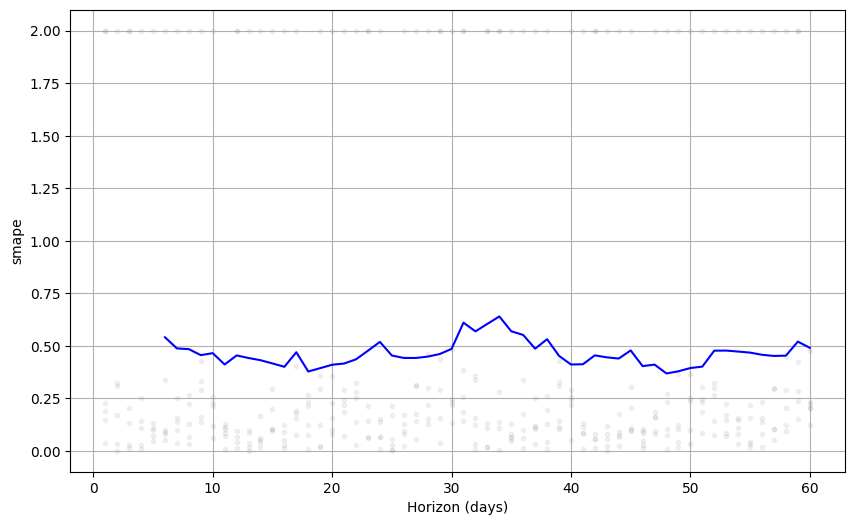

In [ ]:
plot_cross_validation_metric(df_cv3,metric='smape')

In [ ]:
# initial='no of training points',period='Step size,horizon='No. of steps to forecast'
df_cv4=cross_validation(m4,initial='730 days',period='30 days',horizon='60 days')

INFO:prophet:Making 6 forecasts with cutoffs between 2015-01-02 00:00:00 and 2015-06-01 00:00:00


  0%|          | 0/6 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpb1rcqtl9/emthwe84.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb1rcqtl9/c1kw19fy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54799', 'data', 'file=/tmp/tmpb1rcqtl9/emthwe84.json', 'init=/tmp/tmpb1rcqtl9/c1kw19fy.json', 'output', 'file=/tmp/tmpb1rcqtl9/prophet_model2_ji1w8a/prophet_model-20230511071011.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:10:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:10:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb1rcqtl9/o4cc1o00.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb1rcqtl9/1ow1dcyi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [ ]:
df_cv4

ds         yhat   yhat_lower   yhat_upper     y     cutoff
0   2015-01-03  5873.578999  5081.670691  6716.235328  5023 2015-01-02
1   2015-01-04   118.003345  -681.359313   836.002318     0 2015-01-02
2   2015-01-05  6512.967188  5671.904174  7271.686870  6239 2015-01-02
3   2015-01-06  5975.583708  5155.579873  6691.331340  4574 2015-01-02
4   2015-01-07  5759.636728  4984.641045  6569.240956  4796 2015-01-02
..         ...          ...          ...          ...   ...        ...
355 2015-07-27  5462.932749  4641.081772  6248.936992  6102 2015-06-01
356 2015-07-28  4989.218346  4204.090820  5813.694632  5011 2015-06-01
357 2015-07-29  4832.298905  4044.306262  5622.842360  4782 2015-06-01
358 2015-07-30  4691.735849  3947.021225  5538.599941  5020 2015-06-01
359 2015-07-31  4917.691209  4185.773320  5715.886681  5263 2015-06-01

[360 rows x 6 columns]

In [ ]:
pm4=performance_metrics(df_cv4)

INFO:prophet:Skipping MAPE because y close to 0


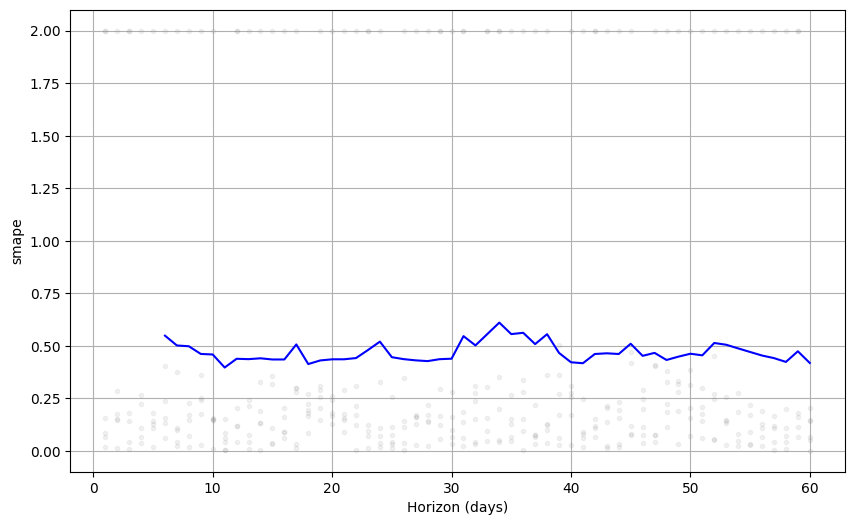

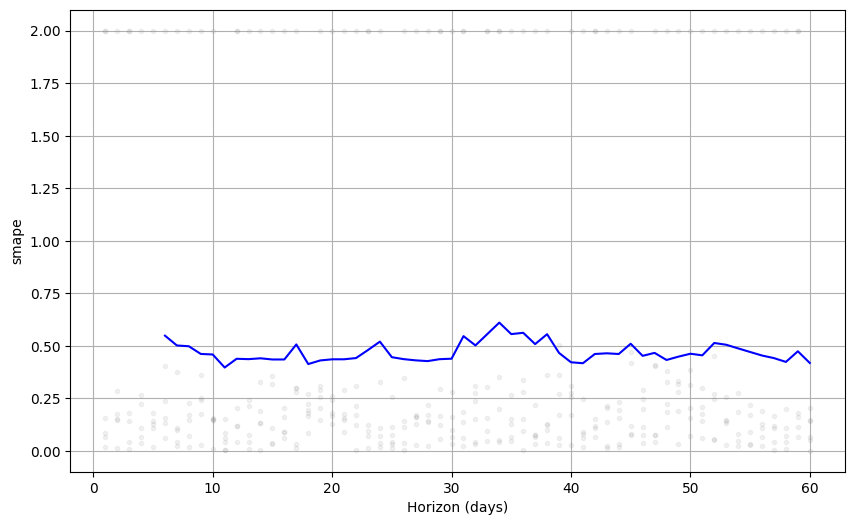

In [ ]:
plot_cross_validation_metric(df_cv4,metric='smape')

In [ ]:
pm1['smape'].mean(),pm2['smape'].mean(),pm3['smape'].mean(),pm4['smape'].mean()

(0.46176331861248626,
 0.15378788778101193,
 0.46347029986422644,
 0.4699721812583719)

#Changepoint Detection 

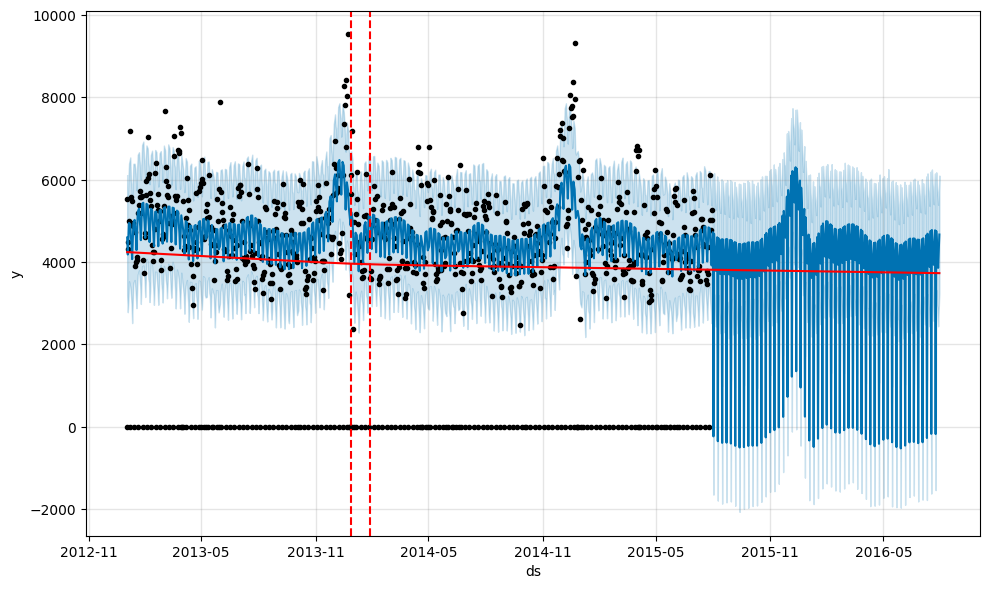

In [393]:
from prophet.plot import add_changepoints_to_plot
fig=m1.plot(forecast1)
a=add_changepoints_to_plot(fig.gca(),m1,forecast1)

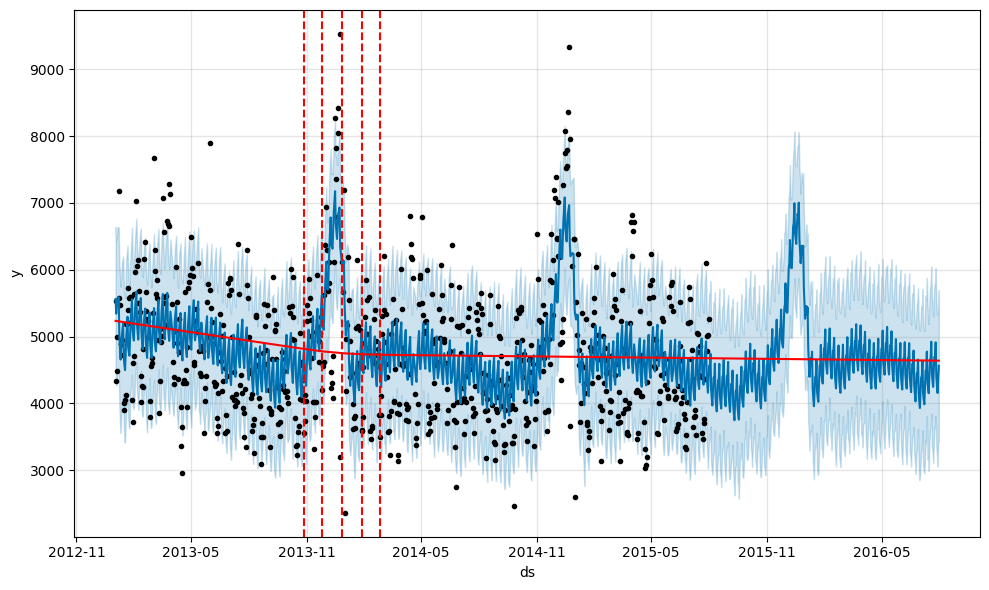

In [395]:
from prophet.plot import add_changepoints_to_plot
fig=m2.plot(forecast2)
a=add_changepoints_to_plot(fig.gca(),m2,forecast2)

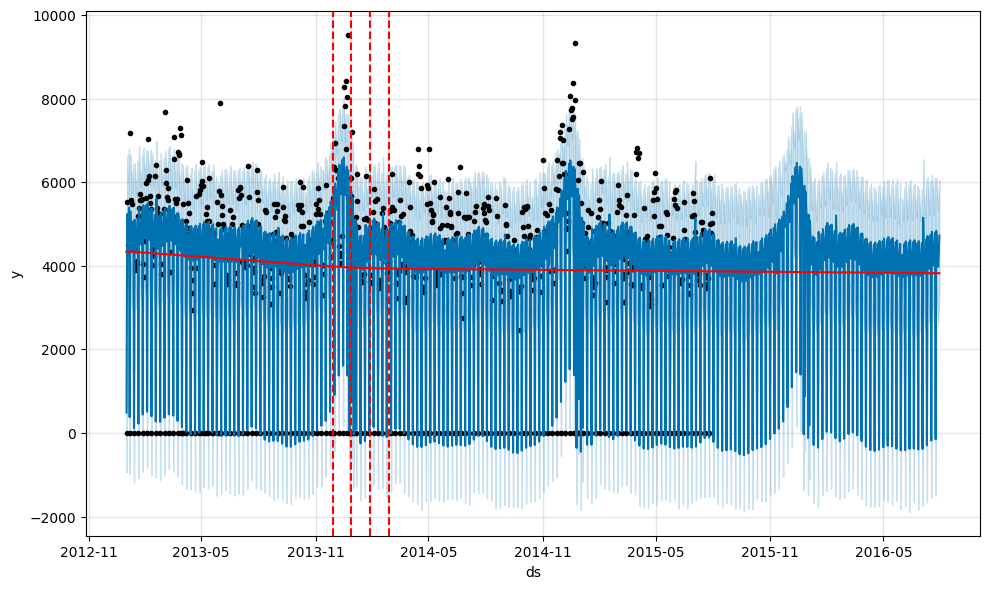

In [396]:
from prophet.plot import add_changepoints_to_plot
fig=m3.plot(forecast3)
a=add_changepoints_to_plot(fig.gca(),m3,forecast3)

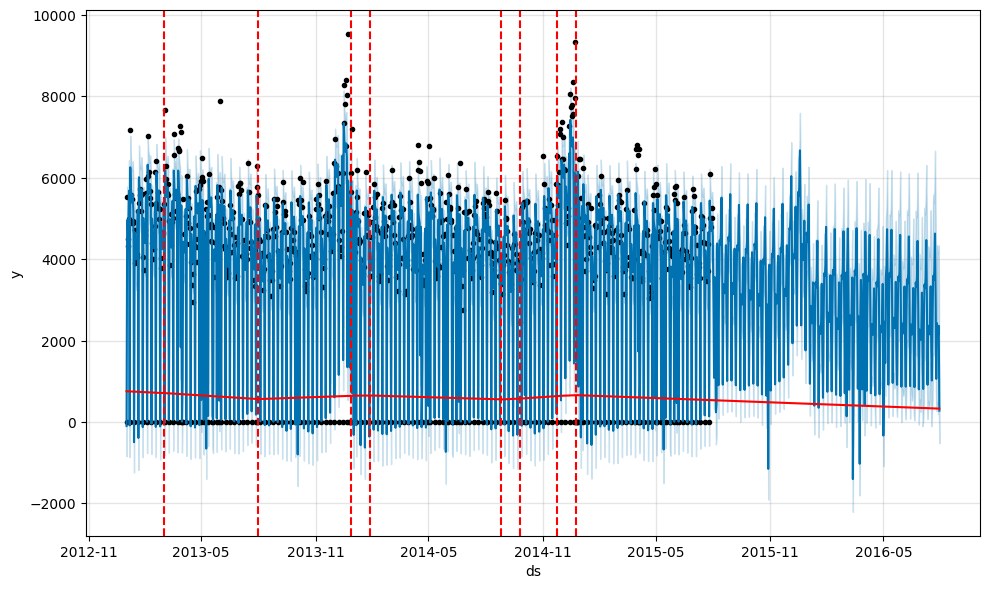

In [397]:
from prophet.plot import add_changepoints_to_plot
fig=m4.plot(forecast4)
a=add_changepoints_to_plot(fig.gca(),m4,forecast4)

#Adjusting changepoint prior scale

In [419]:
# fit the model
m1_a = Prophet(changepoint_prior_scale=0.5)
m1_a.fit(series_fbp)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb1rcqtl9/mrxrqboh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb1rcqtl9/qy9e_2z8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25960', 'data', 'file=/tmp/tmpb1rcqtl9/mrxrqboh.json', 'init=/tmp/tmpb1rcqtl9/qy9e_2z8.json', 'output', 'file=/tmp/tmpb1rcqtl9/prophet_modelbn63qo6n/prophet_model-20230511074237.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:42:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:42:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [420]:
#Creating future dates for prediction
future = m1_a.make_future_dataframe(periods=365)

# Making predictions
forecast1 = m1_a.predict(future)

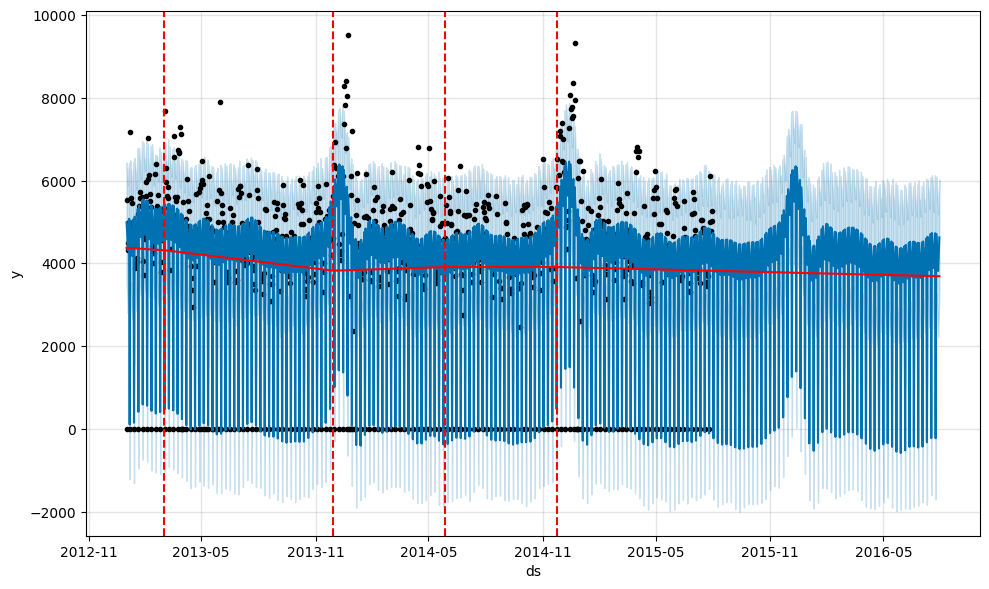

In [421]:
# Plotting the forecast
fig = m1_a.plot(forecast1)
a=add_changepoints_to_plot(fig.gca(),m1_a,forecast1)

In [425]:
# fit the model
m2_a = Prophet(changepoint_prior_scale=0.5)
m2_a.fit(series2_fbp)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb1rcqtl9/ujcql8k0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb1rcqtl9/lkkf6fy4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46505', 'data', 'file=/tmp/tmpb1rcqtl9/ujcql8k0.json', 'init=/tmp/tmpb1rcqtl9/lkkf6fy4.json', 'output', 'file=/tmp/tmpb1rcqtl9/prophet_modeluis79fho/prophet_model-20230511074533.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:45:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:45:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [426]:
#Creating future dates for prediction
future = m2_a.make_future_dataframe(periods=365)

# Making predictions
forecast2 = m2_a.predict(future)

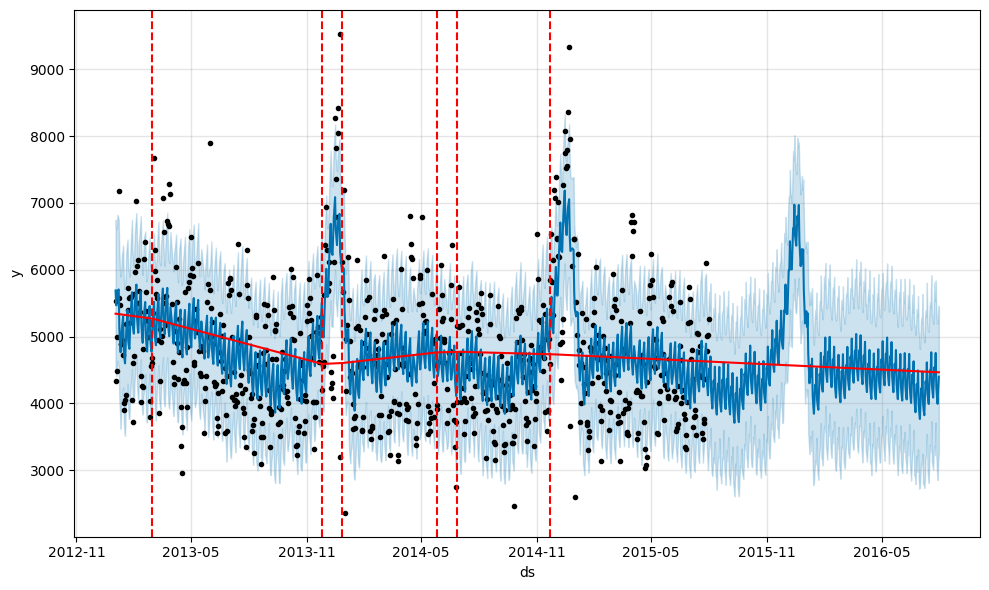

In [427]:
# Plotting the forecast
fig = m2_a.plot(forecast2)
a=add_changepoints_to_plot(fig.gca(),m2_a,forecast2)

In [428]:
# fit the model
m2_a = Prophet(changepoint_prior_scale=0.005)
m2_a.fit(series2_fbp)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb1rcqtl9/hq6iz2bx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb1rcqtl9/88ali778.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=793', 'data', 'file=/tmp/tmpb1rcqtl9/hq6iz2bx.json', 'init=/tmp/tmpb1rcqtl9/88ali778.json', 'output', 'file=/tmp/tmpb1rcqtl9/prophet_modeln_k93pqr/prophet_model-20230511074748.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:47:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:47:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [429]:
#Creating future dates for prediction
future = m2_a.make_future_dataframe(periods=365)

# Making predictions
forecast2 = m2_a.predict(future)

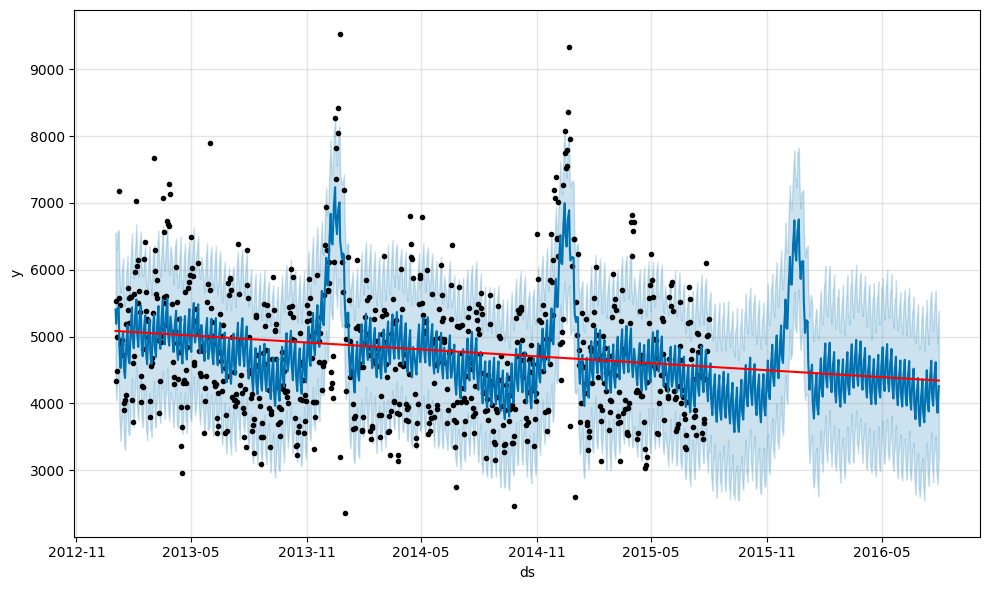

In [430]:
# Plotting the forecast
fig = m2_a.plot(forecast2)
a=add_changepoints_to_plot(fig.gca(),m2_a,forecast2)

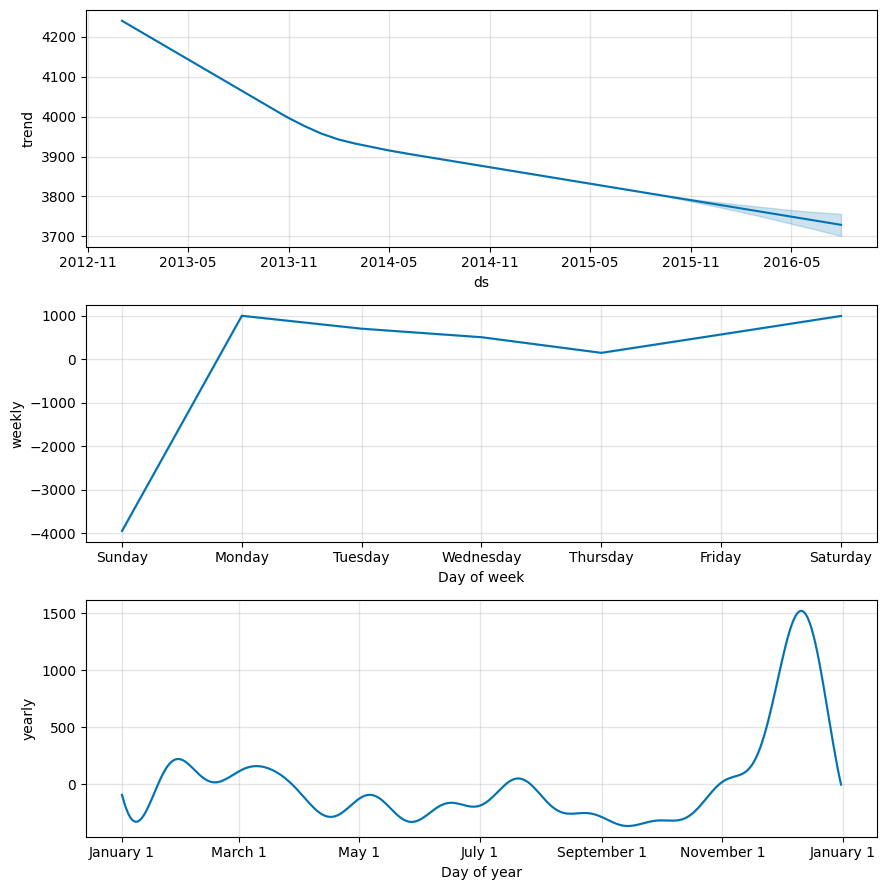

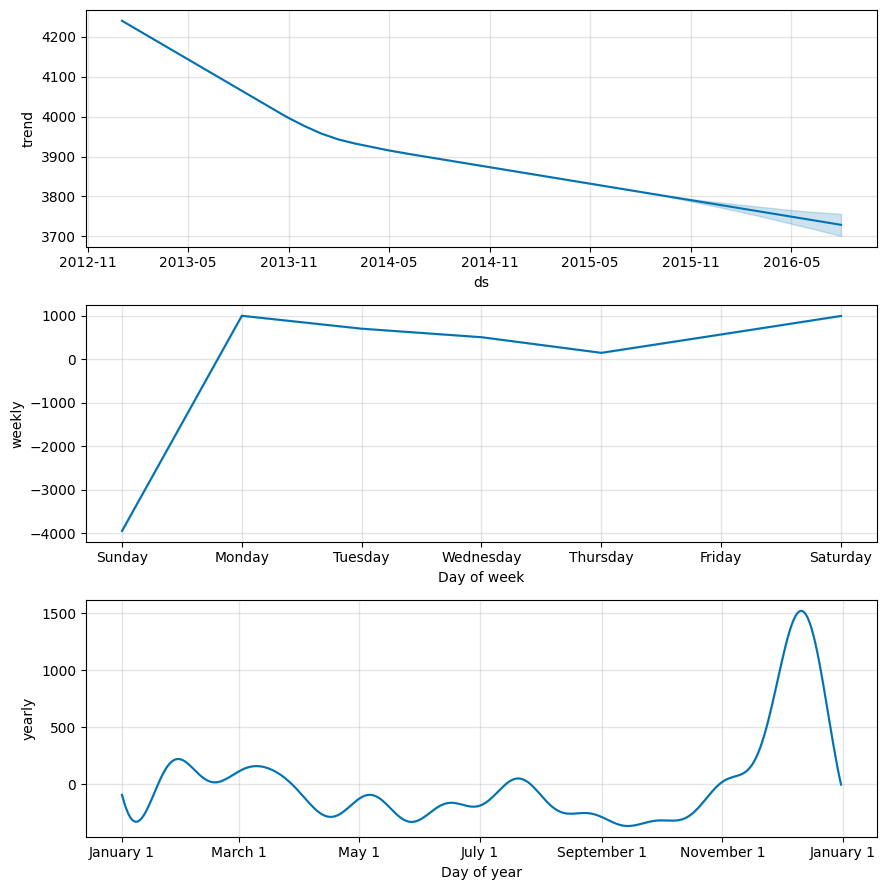

In [ ]:
m1.plot_components(forecast1)

In [ ]:
m_a=Prophet(changepoint_prior_scale=0.5)
forecast_a=m_a.fit()

In [ ]:
from prophet.plot import add_changepoints_to_plot
fig=m4.plot(forecast4)
a=add_changepoints_to_plot(fig.gca(),m4,forecast4)

## ***8.*** ***Future Work***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File
filename = 'Retail_sales_prediction.sav'
pickle.dump(lgbm_reg_automl, open(filename, 'wb'))

NameError: ignored

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model_score= loaded_model.score(X_test, y_test)
print(loaded_model_score)

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

## Conclusions from EDA


* The most selling and crowded store type is A.
* Sales is highly correlated to number of Customers.
* More stores are opened during School holidays than State holidays.
* Absence of values in features CompetitionOpenSinceYear/Month doesn’t indicate the absence of competition as CompetitionDistance values are not null where the other two values are null.
* Mondays have most sales since most of the Sundays are closed.
* Promo 1 is a successful event as the sales have increased but promo 2 was unsuccessful as sales decreased after the implemention.
* Store type b has higher sales and customers per store than other store types. More Store type b must be opened.
* Assortment b is available only at store type b and it has more sales and customers than any other assortment. More assortment b must be stocked to meet the demands of customers.
* Weekly sales and customers peak at the mid-December. It may be guessed that people buy medicines in advance just before the shops close for the holiday season.


## Conclusions from Modelling



**ML Model selected for deployment: Light GBM**
* Light GBM is a fast, distributed, high-performance gradient boosting framework that uses a tree-based learning algorithm.

* It also supports GPU learning and is thus widely used for data science application development.

* Light GBM is prefixed as ‘Light’ because of its high speed. Light GBM can handle the large size of data and takes lower memory to run.

* Light GBM grows tree vertically while other algorithm grows trees horizontally meaning that Light GBM grows tree leaf-wise while other algorithm grows level-wise.


**Suggestion:**
* When we are dealing with huge dataset & time is a constraint use Light GBM Model else when dataset is small than XGBoost can provide better results.

#Conclusions from Time series Analysis

* The time series analysis using Prophet allowed us to capture the underlying trends and patterns in the sales data, and predict future sales based on these trends. We were able to identify seasonality and trends in the data, and incorporate them into the forecasting model. 
* The model was able to generate accurate predictions for future sales, which can be used by the store to make informed decisions on inventory management, staffing, and marketing strategies.

* Overall, time series analysis using Prophet is a powerful tool for forecasting future sales trends, especially for businesses with seasonal patterns. It provides valuable insights into future sales trends and helps businesses make informed decisions to improve their operations.
*  This project demonstrates the potential of time series analysis and highlights the importance of selecting appropriate machine learning techniques for specific problems.